In [1]:
%matplotlib widget

import math
import numpy as np
from scipy.linalg import block_diag
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cycler
from matplotlib.markers import MarkerStyle
from flatten_dict import flatten, unflatten
import re
import importlib
import pandas as pd
import seaborn as sns

plt.rcParams['svg.fonttype'] = 'path'

try:
    importlib.reload(dda)
except NameError:
    import dd_analysis as dda
    
try:
    importlib.reload(dd)
except NameError:
    import disjoint_domain as dd
    
try:
    importlib.reload(util)
except NameError:
    import util
    
try:
    importlib.reload(net_analysis)
except NameError:
    import net_analysis
    
try:
    importlib.reload(pa)
except NameError:
    import problem_analysis as pa

In [2]:
batchsize_runs = {
    'B5': 'data/batchsize/batch5_dd_res_2020-12-29_16-37-09.npz',
    'B10': 'data/batchsize/batch10_dd_res_2020-12-29_17-28-34.npz',
    'B15': 'data/batchsize/batch15_dd_res_2020-12-29_18-10-11.npz',
    'B16': 'data/batchsize/batch16_dd_res_2020-12-23_16-48-15.npz',
    'B20': 'data/batchsize/batch20_dd_res_2020-12-29_18-30-34.npz',
    'B25': 'data/batchsize/batch25_dd_res_2020-12-29_18-44-56.npz',
    'B30': 'data/batchsize/batch30_dd_res_2020-12-29_18-59-20.npz',
    'B31': 'data/batchsize/batch31_dd_res_2020-12-29_15-04-17.npz',
    'B32': 'data/batchsize/batch32_dd_res_2020-12-23_16-13-07.npz',
    'B35': 'data/batchsize/batch35_dd_res_2020-12-29_19-10-51.npz',
    'B40': 'data/batchsize/batch40_dd_res_2020-12-29_19-22-28.npz',
    'B45': 'data/batchsize/batch45_dd_res_2020-12-29_19-31-13.npz',
    'B50': 'data/batchsize/batch50_dd_res_2020-12-29_19-40-00.npz',
    'B55': 'data/batchsize/batch55_dd_res_2020-12-29_19-49-22.npz',
    'B60': 'data/batchsize/batch60_dd_res_2020-12-29_20-07-49.npz',
    'B64': 'data/batchsize/batch64_dd_res_2020-12-23_15-59-45.npz',
    'B65': 'data/batchsize/batch65_dd_res_2020-12-29_20-17-04.npz'
}

In [73]:
domain_holdout_runs = {
    'original -> original': 'data/domain_ho_eqdist_dd_res_2020-12-24_14-56-49.npz',
    # 'original -> equidistant': 'data/domain_ho_orig_dd_res_2020-12-25_09-29-54.npz',
    'original -> 3-3-2': 'data/domain_ho_332_dd_res_2020-12-27_07-40-26.npz',
    'original -> 5-1-2': 'data/domain_ho_512_from_orig_dd_res_2021-01-03_11-43-15.npz',
    
    # 'equidistant -> original': 'data/domain_ho_orig_from_eqdist_dd_res_2021-01-02_06-57-29.npz',
    # 'equidistant -> equidistant': 'data/domain_ho_eqdist_from_eqdist_dd_res_2021-01-01_21-47-45.npz',
    # 'equidistant -> 3-3-2': 'data/domain_ho_332_from_eqdist_dd_res_2021-01-02_16-15-20.npz',
    # 'equidistant -> 5-1-2': 'data/domain_ho_512_from_eqdist_dd_res_2021-01-04_02-04-41.npz',
    
    '3-3-2 -> original': 'data/domain_ho_orig_from_332_dd_res_2020-12-31_02-11-40.npz',
    # '3-3-2 -> equidistant': 'data/domain_ho_eqdist_from_332_dd_res_2020-12-30_20-25-13.npz',
    '3-3-2 -> 3-3-2': 'data/domain_ho_332_from_332_dd_res_2020-12-31_07-28-31.npz',
    '3-3-2 -> 5-1-2': 'data/domain_ho_512_from_332_dd_res_2021-01-03_18-39-16.npz',
    
    '5-1-2 -> original': 'data/domain_ho_orig_from_512_dd_res_2021-01-04_06-53-28.npz',
    # '5-1-2 -> equidistant': 'data/domain_ho_eqdist_from_512_dd_res_2021-01-04_15-05-25.npz',
    '5-1-2 -> 3-3-2': 'data/domain_ho_332_from_512_dd_res_2021-01-04_12-36-34.npz',
    '5-1-2 -> 5-1-2': 'data/domain_ho_512_from_512_dd_res_2021-01-03_04-48-33.npz'
}

In [45]:
dho_runs_share_context = {
    'original --> original': 'data/domain_ho_sharedctx/orig_to_orig_dd_res_2021-09-05_06-28-59.npz',
    'original --> equidistant': 'data/domain_ho_sharedctx/orig_to_eqdist_dd_res_2021-09-05_11-25-31.npz',
    'original --> 3-3-2': 'data/domain_ho_sharedctx/orig_to_332_dd_res_2021-09-05_23-59-22.npz',
    'original --> 5-1-2': 'data/domain_ho_sharedctx/orig_to_512_dd_res_2021-09-06_11-55-36.npz',
    
    'equidistant --> original': 'data/domain_ho_sharedctx/eqdist_to_orig_dd_res_2021-09-06_23-56-33.npz',
    'equidistant --> equidistant': 'data/domain_ho_sharedctx/eqdist_to_eqdist_dd_res_2021-09-07_03-49-14.npz',
    'equidistant --> 3-3-2': 'data/domain_ho_sharedctx/eqdist_to_332_dd_res_2021-09-07_16-02-18.npz',
    'equidistant --> 5-1-2': 'data/domain_ho_sharedctx/eqdist_to_512_dd_res_2021-09-08_05-45-44.npz',
    
    '3-3-2 --> original': 'data/domain_ho_sharedctx/332_to_orig_dd_res_2021-09-08_18-28-40.npz',
    '3-3-2 --> equidistant': 'data/domain_ho_sharedctx/332_to_eqdist_dd_res_2021-09-08_23-55-39.npz',
    '3-3-2 --> 3-3-2': 'data/domain_ho_sharedctx/332_to_332_dd_res_2021-09-09_13-19-32.npz',
    '3-3-2 --> 5-1-2': 'data/domain_ho_sharedctx/332_to_512_dd_res_2021-09-10_02-29-12.npz',
    
    '5-1-2 --> original': 'data/domain_ho_sharedctx/512_to_orig_dd_res_2021-09-10_13-35-50.npz',
    '5-1-2 --> equidistant': 'data/domain_ho_sharedctx/512_to_eqdist_dd_res_2021-09-10_16-56-13.npz',
    '5-1-2 --> 3-3-2': 'data/domain_ho_sharedctx/512_to_332_dd_res_2021-09-11_04-12-31.npz',
    '5-1-2 --> 5-1-2': 'data/domain_ho_sharedctx/512_to_512_dd_res_2021-09-11_15-43-28.npz'
}

In [99]:
dho_runs_share_ctx_and_attrs = {
    'original --> original (CA)': 'data/domain_ho_commonattrs/orig_to_orig_dd_res_2021-11-13_06-08-57.npz',
    'original --> equidistant (CA)': 'data/domain_ho_commonattrs/orig_to_eqdist_dd_res_2021-11-13_13-46-58.npz',
    'original --> 3-3-2 (CA)': 'data/domain_ho_commonattrs/orig_to_332_dd_res_2021-11-13_23-56-14.npz',
    'original --> 5-1-2 (CA)': 'data/domain_ho_commonattrs/orig_to_512_dd_res_2021-11-14_10-58-36.npz',
    
    'equidistant --> original (CA)': 'data/domain_ho_commonattrs/eqdist_to_orig_dd_res_2021-11-14_22-51-46.npz',
    'equidistant --> equidistant (CA)': 'data/domain_ho_commonattrs/eqdist_to_eqdist_dd_res_2021-11-15_06-23-44.npz',
    'equidistant --> 3-3-2 (CA)': 'data/domain_ho_commonattrs/eqdist_to_332_dd_res_2021-11-15_16-40-06.npz',
    'equidistant --> 5-1-2 (CA)': 'data/domain_ho_commonattrs/eqdist_to_512_dd_res_2021-11-16_03-30-43.npz',
    
    '3-3-2 --> original (CA)': 'data/domain_ho_commonattrs/332_to_orig_dd_res_2021-11-16_14-37-46.npz',
    '3-3-2 --> equidistant (CA)': 'data/domain_ho_commonattrs/332_to_eqdist_dd_res_2021-11-16_22-15-06.npz',
    '3-3-2 --> 3-3-2 (CA)': 'data/domain_ho_commonattrs/332_to_332_dd_res_2021-11-17_08-49-24.npz',
    '3-3-2 --> 5-1-2 (CA)': 'data/domain_ho_commonattrs/332_to_512_dd_res_2021-11-17_19-37-00.npz',
    
    '5-1-2 --> original (CA)': 'data/domain_ho_commonattrs/512_to_orig_dd_res_2021-11-18_06-32-58.npz',
    '5-1-2 --> equidistant (CA)': 'data/domain_ho_commonattrs/512_to_eqdist_dd_res_2021-11-18_13-34-46.npz',
    '5-1-2 --> 3-3-2 (CA)': 'data/domain_ho_commonattrs/512_to_332_dd_res_2021-11-18_23-04-53.npz',
    '5-1-2 --> 5-1-2 (CA)': 'data/domain_ho_commonattrs/512_to_512_dd_res_2021-11-19_09-00-09.npz'
}

In [2]:
simple_domain_holdout_runs = {
    'original => original': 'data/simple_domain_ho/orig_from_orig_dd_res_2021-08-11_19-09-03.npz',
    'original => equidistant': 'data/simple_domain_ho/eqdist_from_orig_dd_res_2021-08-11_19-50-03.npz',
    'original => 3-3-2': 'data/simple_domain_ho/332_from_orig_dd_res_2021-08-11_21-34-27.npz',
    'original => 5-1-2': 'data/simple_domain_ho/512_from_orig_dd_res_2021-08-11_22-57-21.npz',
    
    'equidistant => original': 'data/simple_domain_ho/orig_from_eqdist_dd_res_2021-08-12_13-25-54.npz',
    'equidistant => equidistant': 'data/simple_domain_ho/eqdist_from_eqdist_dd_res_2021-08-12_16-20-01.npz',
    'equidistant => 3-3-2': 'data/simple_domain_ho/332_from_eqdist_dd_res_2021-08-12_18-42-53.npz',
    'equidistant => 5-1-2': 'data/simple_domain_ho/512_from_eqdist_dd_res_2021-08-12_20-35-28.npz',
    
    '3-3-2 => original': 'data/simple_domain_ho/orig_from_332_dd_res_2021-08-12_22-37-28.npz',
    '3-3-2 => equidistant': 'data/simple_domain_ho/eqdist_from_332_dd_res_2021-08-12_23-30-34.npz',
    '3-3-2 => 3-3-2': 'data/simple_domain_ho/332_from_332_dd_res_2021-08-13_01-50-16.npz',
    '3-3-2 => 5-1-2': 'data/simple_domain_ho/512_from_332_dd_res_2021-08-13_03-41-42.npz',
    
    '5-1-2 => original': 'data/simple_domain_ho/orig_from_512_dd_res_2021-08-13_05-44-59.npz',
    '5-1-2 => equidistant': 'data/simple_domain_ho/eqdist_from_512_dd_res_2021-08-13_06-33-54.npz',
    '5-1-2 => 3-3-2': 'data/simple_domain_ho/332_from_512_dd_res_2021-08-13_08-42-32.npz',
    '5-1-2 => 5-1-2': 'data/simple_domain_ho/512_from_512_dd_res_2021-08-13_10-34-13.npz'
}

In [4]:
simple_dho_runs_repeat_attrs = {
    'original ==> original': 'data/simple_domain_ho_repeat_attrs/orig_from_orig_dd_res_2021-08-05_18-57-10.npz',
    'original ==> equidistant': 'data/simple_domain_ho_repeat_attrs/eqdist_from_orig_dd_res_2021-08-05_19-26-44.npz',
    'original ==> 3-3-2': 'data/simple_domain_ho_repeat_attrs/332_from_orig_dd_res_2021-08-05_20-42-45.npz',
    'original ==> 5-1-2': 'data/simple_domain_ho_repeat_attrs/512_from_orig_dd_res_2021-08-05_21-41-50.npz',
    
    'equidistant ==> original': 'data/simple_domain_ho_repeat_attrs/orig_from_eqdist_dd_res_2021-08-05_23-15-50.npz',
    'equidistant ==> equidistant': 'data/simple_domain_ho_repeat_attrs/eqdist_from_eqdist_dd_res_2021-08-06_02-05-52.npz',
    'equidistant ==> 3-3-2': 'data/simple_domain_ho_repeat_attrs/332_from_eqdist_dd_res_2021-08-06_03-43-58.npz',
    'equidistant ==> 5-1-2': 'data/simple_domain_ho_repeat_attrs/512_from_eqdist_dd_res_2021-08-06_04-58-49.npz',
    
    '3-3-2 ==> original': 'data/simple_domain_ho_repeat_attrs/orig_from_332_dd_res_2021-08-06_06-06-50.npz',
    '3-3-2 ==> equidistant': 'data/simple_domain_ho_repeat_attrs/eqdist_from_332_dd_res_2021-08-06_06-34-02.npz',
    '3-3-2 ==> 3-3-2': 'data/simple_domain_ho_repeat_attrs/332_from_332_dd_res_2021-08-06_07-46-33.npz',
    '3-3-2 ==> 5-1-2': 'data/simple_domain_ho_repeat_attrs/512_from_332_dd_res_2021-08-06_08-43-41.npz',
    
    '5-1-2 ==> original': 'data/simple_domain_ho_repeat_attrs/orig_from_512_dd_res_2021-08-06_09-48-24.npz',
    '5-1-2 ==> equidistant': 'data/simple_domain_ho_repeat_attrs/eqdist_from_512_dd_res_2021-08-06_10-13-01.npz',
    '5-1-2 ==> 3-3-2': 'data/simple_domain_ho_repeat_attrs/332_from_512_dd_res_2021-08-06_11-19-02.npz',
    '5-1-2 ==> 5-1-2': 'data/simple_domain_ho_repeat_attrs/512_from_512_dd_res_2021-08-06_12-12-53.npz'
}

In [155]:
intergroup_runs = {
    'intergroup near -> near': 'data/intergroup/near_to_near_dd_res_2021-01-10_10-55-52.npz',
    'intergroup near -> far': 'data/intergroup/near_to_far_dd_res_2021-01-11_01-40-33.npz',
    'intergroup far -> near': 'data/intergroup/far_to_near_dd_res_2021-01-11_11-13-03.npz',
    'intergroup far -> far': 'data/intergroup/far_to_far_dd_res_2021-01-12_13-54-22.npz'
}

In [15]:
def make_ctx_varying_cluster_info():
    cluster_types = ['4-2-2', '8', '3-3-2', '5-1-2']
    item_perms = [dd.choose_k_inds(dd.ITEMS_PER_DOMAIN, dd.ITEMS_PER_DOMAIN) for _ in cluster_types]
    return [{'clusters': ct, 'item_permutation': perm} for ct, perm in zip(cluster_types, item_perms)]

ctx_varying_cluster_runs = {
    'Separate ctx, same 4th domain': 'data/varying_cluster_ho/separate_same_dd_res_2021-10-08_02-47-14.npz',
    'Separate ctx, different 4th domain': 'data/varying_cluster_ho/separate_different_dd_res_2021-10-08_11-50-49.npz',
    'Shared ctx, same 4th domain': 'data/varying_cluster_ho/shared_same_dd_res_2021-10-08_22-47-48.npz',
    'Shared ctx, different 4th domain': 'data/varying_cluster_ho/shared_different_dd_res_2021-10-09_09-43-49.npz'
}

ctx_varying_cluster_combo_runs = {
    'Separate ctx, combotest': 'data/varying_cluster_combo/separate_same_dd_res_2021-11-08_16-21-19.npz',
    'Separate ctx, different, combotest': 'data/varying_cluster_combo/separate_different_dd_res_2021-10-12_16-05-20.npz',
    'Shared ctx, combotest': 'data/varying_cluster_combo/shared_same_dd_res_2021-11-08_17-48-21.npz',
    'Shared ctx, different, combotest': 'data/varying_cluster_combo/shared_different_dd_res_2021-10-12_18-32-29.npz',
    'One domain, combotest': 'data/varying_cluster_combo/1domain_dd_res_2021-11-08_18-11-14.npz',
    'Shared ctx, common attrs, combotest':  'data/varying_cluster_combo/shared_commonattrs_same_dd_res_2021-11-08_19-36-52.npz',
    'Shared ctx, common attrs, different, combotest': 'data/varying_cluster_combo/shared_commonattrs_different_dd_res_2021-11-06_03-23-24.npz',
    'One domain, common attrs, combotest': 'data/varying_cluster_combo/1domain_commonattrs_dd_res_2021-11-08_19-59-28.npz',
    'Separate ctx, common attrs, combotest': 'data/varying_cluster_combo/separate_commonattrs_same_dd_res_2021-11-08_21-25-18.npz',
    'Shared ctx, common attrs, 3-combotest': 'data/varying_cluster_combo/shared_commonattrs_same_ho3_dd_res_2021-11-09_16-10-56.npz',
    'One domain, common attrs, 3-combotest': 'data/varying_cluster_combo/1domain_commonattrs_ho3_dd_res_2021-11-09_16-33-37.npz',
    'Separate ctx, common attrs, 3-combotest': 'data/varying_cluster_combo/separate_commonattrs_same_ho3_dd_res_2021-11-09_17-59-27.npz'
}

In [14]:
def make_permuted_cluster_info(n_domains=4):
    item_perms = [util.choose_k_inds(dd.ITEMS_PER_DOMAIN, dd.ITEMS_PER_DOMAIN) for _ in range(n_domains)]
    return [{'clusters': '4-2-2', 'item_permutation': perm} for perm in item_perms] 

permuted_cluster_ho_runs = {
    'Permuted, separate ctx, same held-out': 'data/permuted_cluster_ho/separate_same_dd_res_2021-11-23_07-46-28.npz',
    'Permuted, separate ctx, different held-out': 'data/permuted_cluster_ho/separate_different_dd_res_2021-11-23_15-16-08.npz',
    'Permuted, shared ctx, same held-out': 'data/permuted_cluster_ho/shared_same_dd_res_2021-11-24_00-28-00.npz',
    'Permuted, shared ctx, different held-out': 'data/permuted_cluster_ho/shared_different_dd_res_2021-11-24_10-18-43.npz'
}

permuted_cluster_combo_runs = {
    'Permuted, shared ctx, combotest': 'data/permuted_cluster_combo/shared_same_dd_res_2021-11-24_11-47-08.npz',
    'Permuted, separate ctx, combotest': 'data/permuted_cluster_combo/separate_same_dd_res_2021-11-24_11-03-37.npz',
    'Permuted, 1 domain, combotest': 'data/permuted_cluster_combo/1domain_dd_res_2021-11-24_11-58-47.npz',
    'Permuted, shared ctx, common attrs, combotest': 'data/permuted_cluster_combo/shared_commonattrs_same_dd_res_2021-11-24_13-25-54.npz',
    'Permuted, separate ctx, common attrs, combotest': 'data/permuted_cluster_combo/separate_commonattrs_same_dd_res_2021-11-24_12-42-49.npz',
    'Permuted, 1 domain, common attrs, combotest': 'data/permuted_cluster_combo/1domain_commonattrs_dd_res_2021-11-24_13-37-31.npz'
}

In [8]:
tree_ring_ho_runs = {
    'tree => tree': 'data/ring_tree_ho/tree_to_tree_dd_res_2021-11-30_18-07-37.npz',
    'ring => tree': 'data/ring_tree_ho/ring_to_tree_dd_res_2021-11-30_19-14-55.npz',
    'tree => ring': 'data/ring_tree_ho/tree_to_ring_dd_res_2021-11-30_18-50-25.npz',
    'ring => ring': 'data/ring_tree_ho/ring_to_ring_dd_res_2021-11-30_19-58-42.npz'
}

tree_ring_ho_shared_runs = {
    'tree => tree': 'data/ring_tree_ho/shared_tree_to_tree_dd_res_2021-12-01_12-03-04.npz',
    'ring => tree': 'data/ring_tree_ho/shared_ring_to_tree_dd_res_2021-12-01_13-16-52.npz',
    'tree => ring': 'data/ring_tree_ho/shared_tree_to_ring_dd_res_2021-12-01_12-44-38.npz',
    'ring => ring': 'data/ring_tree_ho/shared_ring_to_ring_dd_res_2021-12-01_14-06-24.npz'
}

In [34]:
older_res_paths = {
    'Original': 'data/dd_res_2020-12-03_01-31-32.npz',   # DON'T USE, something's wrong with it
    'Shared repr.': 'data/merged_repr_dd_res_2020-12-04_05-15-35.npz',
    'Small item repr': 'data/small_item_repr_dd_res_2020-11-24_18-48-00.npz',
    'More compressed': 'data/all_ratios_0.5_dd_res_2020-11-24_21-17-07.npz',
    'Half-size HL': 'data/half_hidden_longer_dd_res_2020-11-25_01-06-37.npz',
    'Merged item repr.': 'data/no_item_repr_reallocate_dd_res_2020-12-04_06-30-32.npz',
    'Merged context repr.': 'data/no_ctx_repr_reallocate_dd_res_2020-12-04_07-48-18.npz',
    'All merged': 'data/no_repr_reallocate_dd_res_2020-12-03_03-24-49.npz',
    'One domain': 'data/1domain_dd_res_2020-12-14_12-57-53.npz',
    'Original (small init)': 'data/4domain_small_init_dd_res_2020-12-23_00-34-01.npz',
    'One domain (small init)': 'data/1domain_small_init_dd_res_2020-12-23_00-52-41.npz',
    'Original no reuse': 'data/original_no_reuse_dd_res_2021-01-06_17-15-11.npz',
    '4-4 equal': 'data/4-4_dd_res_2021-01-05_14-16-02.npz',
    '4-4 no reuse': 'data/4-4_no_reuse_dd_res_2021-01-06_14-51-28.npz',
    '4-4 unequal': 'data/4-4_unequal_dd_res_2021-01-06_19-37-51.npz',
    '4-4 equal independent': 'data/44_dho_dd_res_2021-01-09_06-31-41.npz',
    'Original independent': 'data/422_dho_dd_res_2021-01-09_21-57-46.npz',
    'Original (new)': 'data/original_new_dd_res_2021-01-12_20-21-39.npz',
    'Fixed biases': 'data/fixed_biases_dd_res_2021-01-12_20-30-39.npz',
    'All merged fixed biases': 'data/all_merged_fixed_biases_44_dd_res_2021-01-15_13-26-57.npz',
    '2domain test': 'data/2domain_weight_test_dd_res_2021-01-15_15-19-33.npz',
    'All merged 2 groups': 'data/all_merged_2group_dd_res_2021-01-18_15-12-35.npz',
    'All merged 3-3-2': 'data/all_merged_332_dd_res_2021-01-18_15-18-12.npz',
    'All merged 5-1-2': 'data/all_merged_512_dd_res_2021-01-18_15-24-33.npz',
    'Original longer': 'data/original_longer_dd_res_2021-07-22_01-25-47.npz',
    'Repeated attrs': 'data/repeated_attrs_longer_dd_res_2021-07-22_03-11-12.npz',
    'Clustered, unequal freq.': 'data/dissoc/simple_lowerlr_structured_uneq_freq_dd_res_2021-08-11_12-44-14.npz',
    'Clustered, equal freq.': 'data/dissoc/simple_lowerlr_structured_eq_freq_dd_res_2021-08-11_13-12-12.npz',
    'Flat, equal freq.': 'data/dissoc/simple_lowerlr_unstructured_eq_freq_dd_res_2021-08-11_13-39-58.npz',
    'Flat, unequal freq.': 'data/dissoc/simple_lowerlr_unstructured_uneq_freq_dd_res_2021-08-11_14-07-54.npz',
    'Dissoc. net, orig': 'data/dissoc/simple_orig_dd_res_2021-08-09_20-57-19.npz',
    'Dissoc. orig weightdrop': 'data/dissoc/simple_orig_weightdrop_dd_res_2021-08-10_00-58-28.npz',
    'Dissoc. orig lowerlr': 'data/dissoc/simple_orig_lower_lr_dd_res_2021-08-10_23-19-32.npz',
    'Dissoc. orig lowerlr2': 'data/dissoc/simple_orig_lower_lr2_dd_res_2021-08-11_00-39-02.npz',
    'Merged ctx, 1 ctx/domain': 'data/merged_ctx_repr_1ctx_nopadding_dd_res_2021-07-29_14-24-47.npz',
    'Merged ctx, 1 ctx/domain, padded': 'data/merged_ctx_repr_1ctx_dd_res_2021-07-29_13-31-08.npz',
    'Identity activations': 'data/merged_ctx_1ctx_id_act_dd_res_2021-07-29_17-59-18.npz',
    'No context': 'data/no_ctx_dd_res_2021-07-29_21-27-10.npz',
    'No context, no biases': 'data/no_ctx_no_bias_dd_res_2021-07-30_10-48-23.npz',
    'All merged, no ctx no biases': 'data/all_merged_no_bias_dd_res_2021-08-02_11-56-29.npz',
    'All merged, no ctx, smaller HL': 'data/all_merged_no_bias_fewer_dd_res_2021-09-07_17-09-26.npz',
    'No reprs, same size HL': 'data/short_save_params_no_repr_dd_res_2020-11-26_12-11-26.npz',
    'One domain': 'data/combo_1domain_dd_res_2021-08-10_12-48-04.npz',
    'Combo test, separate': 'data/combo_repattrs_separatectx_dd_res_2021-09-02_17-43-32.npz',
    'Combo test, shared': 'data/combo_repattrs_sharedctx_dd_res_2021-09-03_18-26-27.npz',
    'Sigmoid, 1HL': 'data/iomat_snapshot/sigmoid_1hl_dd_res_2021-10-05_10-59-10.npz',
    'Sigmoid, 2HL': 'data/iomat_snapshot/sigmoid_2hl_dd_res_2021-10-05_10-36-03.npz',
    'Linear, 2HL': 'data/iomat_snapshot/linear_2hl_dd_res_2021-10-05_11-23-15.npz',
    'Sigmoid, 2HL compressed': 'data/iomat_snapshot/sigmoid_2hl_compress8_dd_res_2021-09-16_17-50-15.npz',
    'Sigmoid, 1HL compressed': 'data/iomat_snapshot/sigmoid_1hl_compress8_dd_res_2021-09-17_01-22-39.npz',
    'ReLU, 2HL': 'data/iomat_snapshot/relu_2hl_lr0.001_dd_res_2021-10-05_11-48-54.npz',
    'ReLU, 2HL compressed': 'data/iomat_snapshot/relu_2hl_compress8_dd_res_2021-09-21_14-27-19.npz',
    'ReLU, 2HL both compressed': 'data/iomat_snapshot/relu_2hl_doublecompress8_dd_res_2021-09-21_15-15-42.npz',
    'Original, common attrs': 'data/original_commonattrs_dd_res_2021-11-08_10-31-22.npz',
    'Original, common attrs, padded': 'data/original_commonattrs_padded_dd_res_2021-11-08_13-15-27.npz',
    'Combo test, common attrs, separate': 'data/combo_shareattrs_separatectx_dd_res_2021-11-10_19-52-22.npz',
    'Combo test, common attrs, shared': 'data/combo_shareattrs_sharedctx_dd_res_2021-11-10_21-49-05.npz',
    'Combo test, common attrs, 1 domain': 'data/combo_shareattrs_1domain_dd_res_2021-11-10_22-19-57.npz',
}

In [7]:
final_tree_ring_sigmoid = {
    'Hierarchy to Hierarchy': 'data/final_runs/2tree_to_tree_and_ring_dd_res_2022-02-16_11-37-17.npz',
    'Hierarchy to Ring': {'inherit_from': 'Hierarchy to Hierarchy', 'etg_domain': 2},
    'Ring to Hierarchy': {'inherit_from': 'Ring to Ring', 'etg_domain': 2},
    'Ring to Ring': 'data/final_runs/2ring_to_ring_and_tree_dd_res_2022-02-16_11-57-26.npz'
}

final_tree_ring_linear = {
    'Hierarchy to Hierarchy': 'data/final_runs/linear_2tree_to_tree_and_ring_dd_res_2022-02-03_21-07-20.npz',
    'Hierarchy to Ring': {'inherit_from': 'Hierarchy to Hierarchy', 'etg_domain': 2},
    'Ring to Hierarchy': {'inherit_from': 'Ring to Ring', 'etg_domain': 2},
    'Ring to Ring': 'data/final_runs/linear_2ring_to_ring_and_tree_dd_res_2022-02-09_02-49-05.npz'
}

tree_ordering_sigmoid = {
    'Hierarchy to Hierarchy': 'data/final_runs/2tree_to_tree_and_ord_dd_res_2022-02-23_08-07-57.npz',
    'Hierarchy to Ordering': {'inherit_from': 'Hierarchy to Hierarchy', 'etg_domain': 2},
    'Ordering to Hierarchy': {'inherit_from': 'Ordering to Ordering', 'etg_domain': 2},
    'Ordering to Ordering': 'data/final_runs/2ord_to_ord_and_tree_dd_res_2022-02-23_05-33-22.npz'
}

tree_ordering_linear = {
    'Hierarchy to Hierarchy': 'data/final_runs/2tree_to_tree_and_ord_linear_dd_res_2022-03-08_16-15-48.npz',
    'Hierarchy to Ordering': {'inherit_from': 'Hierarchy to Hierarchy', 'etg_domain': 2},
    'Ordering to Hierarchy': {'inherit_from': 'Ordering to Ordering', 'etg_domain': 2},
    'Ordering to Ordering': 'data/final_runs/2ord_to_ord_and_tree_linear_dd_res_2022-03-08_19-46-34.npz'
}

tree_saxe_ordering_sigmoid = {
    'Hierarchy to Hierarchy': 'data/final_runs/2tree_to_tree_and_sord_dd_res_2022-04-15_20-28-35.npz',
    'Hierarchy to Ordering': {'inherit_from': 'Hierarchy to Hierarchy', 'etg_domain': 2},
    'Ordering to Hierarchy': {'inherit_from': 'Ordering to Ordering', 'etg_domain': 2},
    'Ordering to Ordering': 'data/final_runs/2sord_to_sord_and_tree_dd_res_2022-04-15_17-01-47.npz'
}

tree_saxe_ordering_linear = {
    'Hierarchy to Hierarchy': 'data/final_runs/2tree_to_tree_and_sord_linear_dd_res_2022-04-17_19-17-04.npz',
    'Hierarchy to Ordering': {'inherit_from': 'Hierarchy to Hierarchy', 'etg_domain': 2},
    'Ordering to Hierarchy': {'inherit_from': 'Ordering to Ordering', 'etg_domain': 2},
    'Ordering to Ordering': 'data/final_runs/2sord_to_sord_and_tree_linear_dd_res_2022-04-19_09-21-33.npz'
}

tree_saxe_ordering_no_cd_loss = {
    'Hierarchy to Hierarchy': 'data/final_runs/2tree_to_tree_and_sord_no_cd_loss_dd_res_2022-04-28_19-18-08.npz',
    'Hierarchy to Ordering': {'inherit_from': 'Hierarchy to Hierarchy', 'etg_domain': 2},
    'Ordering to Hierarchy': {'inherit_from': 'Ordering to Ordering', 'etg_domain': 2},
    'Ordering to Ordering': 'data/final_runs/2sord_to_sord_and_tree_no_cd_loss_dd_res_2022-04-29_02-35-46.npz'
}

In [8]:
# Load data from previous runs

try:
    curr_load_settings = load_settings
except NameError:
    curr_load_settings = {}
    
load_settings = {
    'dist_metric': 'euclidean',
    # 'corr_type': 'pearson',
    'corr_type': 'covar_centered',
    'include_rdms': True,
    'compute_full_rdms': False,
    'include_individual_corr_mats': False,
    'include_individual_rdms': False,
    'subsample_snaps': 1,
    'effective_sv_snaps': ('attr', 'attr_preact'),
    'pair_effective_sv_snaps': ('attr_preact',)
}

curr_res_paths = {}
if load_settings == curr_load_settings:
    try:
        curr_res_paths = res_paths
    except NameError:
        res_data = {}
else:
    res_data = {}
    
res_paths = {
    # 'Tree, no cross-domain loss': 'data/final_runs/no_crossdomain_loss_sigmoid_dd_res_2022-02-02_10-41-23.npz',
    # 'Ring, no cross-domain loss': 'data/final_runs/ring_no_crossdomain_loss_sigmoid_dd_res_2022-02-02_11-34-29.npz',
    # 'Ring, no cross-domain loss (old)': 'data/final_runs/ring_no_crossdomain_loss_sigmoid_dd_res_2022-01-18_18-14-20.npz',
    # 'Tree-ring holdout (old)': tree_ring_ho_runs,
    # 'Tree-ring shared contexts, last same': 'data/final_runs/2ctx_shared_treering_same_dd_res_2022-01-24_23-28-50.npz',
    # 'Tree-ring shared contexts, last switched': 'data/final_runs/2ctx_shared_treering_diff_dd_res_2022-01-25_08-12-14.npz',
    # 'Tree-ring shared, shared outputs, same': 'data/final_runs/2ctx_shared_sharedoutput_treering_same_dd_res_2022-01-27_20-01-50.npz',
    # 'Tree-ring shared, shared outputs, switched': 'data/final_runs/2ctx_shared_sharedoutput_treering_diff_dd_res_2022-01-28_03-58-51.npz',
    # 'Old no ctx no biases': older_res_paths['No context, no biases'],
    # 'Sigmoid': final_tree_ring_sigmoid,
    # 'Linear': final_tree_ring_linear,
    # 'Old domain holdout': domain_holdout_runs,
    # 'Hierarchy and ordering': tree_ordering_sigmoid,
    # 'Hierarchy and ordering, linear': tree_ordering_linear,
    'Hierarchy and ordering': tree_saxe_ordering_sigmoid,
    'Hierarchy and ordering, linear': tree_saxe_ordering_linear,
    'Hierarchy and ordering, in-domain loss': tree_saxe_ordering_no_cd_loss
}

if any(['/' in key for key in res_paths]):
    raise RuntimeError('Cannot use a key with a slash (due to flattening/unflattening)')

# Use pre-existing res_data to avoid reloading data whenever possible                
try:
    res_data = net_analysis.load_nested_runs_w_cache(res_paths, curr_res_paths, res_data, load_settings,
                                                     load_fn=dda.get_result_means)  
except:
    # Assume loading failed, revert
    res_paths = curr_res_paths
    raise

Using CUDA
Using CUDA


In [9]:
# Get ready to look at some particular runs

# curr_runs = ['Sigmoid (simplified)', 'Linear (simplified)', 'Sigmoid, no cross-domain training']
# curr_runs = ['Tree', 'Tree, no cross-domain loss', 'Ring', 'Ring, no cross-domain loss']
# curr_runs = ['Tree', 'Tree, linear', 'Ring', 'Ring, linear']
# curr_runs = ['Tree-ring holdout (old)']
# curr_runs = ['Tree-ring shared, shared outputs, same', 'Tree-ring shared, shared outputs, switched']
# curr_runs = ['Tree', 'Ring'] #, 'Tree, linear', 'Ring, linear']

# cluster_types = ['original', 'equidistant', '3-3-2', '5-1-2']
# arrow types (hacky): -> = old/full network, --> = shared context,
# => = simplified network w/ separately generated attrs, ==> = simplified network w/ repeated attrs across domains
# (CA) indicates common output attributes between contexts, within each domain.
# curr_runs = [f'{c1} --> {c2}' for c1 in cluster_types for c2 in cluster_types]
# curr_runs = [f'original --> {c} (CA)' for c in cluster_types] # just use one of each trained type
curr_runs = ['Hierarchy and ordering, in-domain loss']

curr_sets_nested = {name: res_data[name] for name in curr_runs if name in res_data.keys()}
curr_sets = net_analysis.flatten_data_dict(curr_sets_nested)

# get only the runs trained and tested on the same type, for analyses that don't deal with the 2x2 nested structure
curr_sets = {k: v for k, v in curr_sets.items() if re.search(r'([-0-9a-zA-Z]+) ([-=]+>|to) \1', k)}

n_curr = len(curr_sets)

# colors supposed to correspond to accuracy in original generalization test (deprecated)
#prop_cycle = cycler(color=['chocolate', 'yellowgreen', 'royalblue', 'fuchsia', 'orangered'])

# general cycle that supports up to 40 lines
col_cycle = plt.rcParams['axes.prop_cycle']
# col_cycle = cycler(color=['k']).concat(col_cycle)
line_cycle = cycler(linestyle=['-', '--', ':', '-.'])
prop_cycle = line_cycle * col_cycle[:4]
prop_cycle_pairs = col_cycle * line_cycle[1::-1]
# line_cols = col_cycle[:3].by_key()['color']
# marker_cycle = cycler(mfc=line_cols, mec=line_cols)
# prop_cycle = marker_cycle * col_cycle[:3]

# Colors based on what I chose for Figure 1
color_map = {
    'hierarchy': '#D4CC20',
    'ring': '#4DD2FF',
    'ordering': '#34AD6F'
}

plt.close('all')

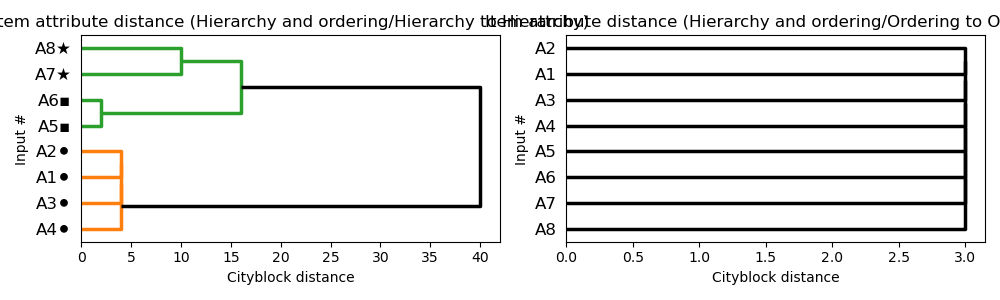

In [58]:
# Plot attribute dendrograms
fig, axs = dda.make_plot_grid(len(curr_sets), 2, ax_dims=(5, 3), ravel=True)
for ax, (label, res) in zip(axs, curr_sets.items()):
    dd.plot_item_attribute_dendrogram(ax=ax, metric='cityblock', **res['net_params'])
    ax.set_title(f'Item attribute distance ({label})')

fig.tight_layout()
plt.show()

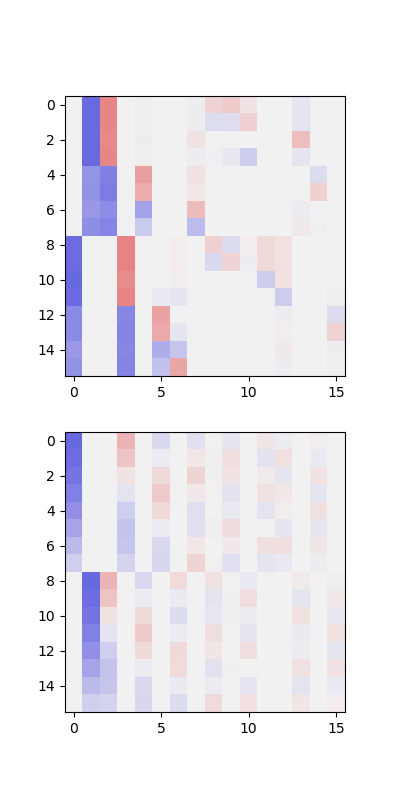

In [8]:
# Plot ground truth attribute correlation

fig, axs = util.make_plot_grid(n_curr, 1, ax_dims=(3.5, 3.5))
fig2, axs2 = util.make_plot_grid(n_curr, 1)

for (res_name, res), ax, ax2 in zip(curr_sets.items(), axs, axs2):
    n_domains = res['net_params']['n_train_domains']
    label = res_name.split()[-1]  # Just trained-on domain
    
    # Since we can, here we average corr mats over runs
    item_mat = dd.make_io_mats(**{**res['net_params'], 'n_domains': n_domains})[0]
    n_items = item_mat.shape[1]
    mean_corr = np.zeros((n_items, n_items))
    
    n_y = len(res['ys'])
    for i, run_y in enumerate(res['ys']):
        # take just the train domains
        n_attrs = run_y.shape[1]
        attrs_to_take = int(run_y.shape[1] * n_domains / res['net_params']['n_domains'])
        run_y = pa.split_and_trim_matrix(run_y, [attrs_to_take, n_attrs-attrs_to_take], axis=1)[0]
        
        ctxfree_io_mat = pa.get_contextfree_io_corr_matrix(item_mat, run_y)
        # io_mat_item_corrs = np.corrcoef(ctxfree_io_mat.T)
        centered_io_mat = ctxfree_io_mat - np.mean(ctxfree_io_mat, axis=0)
        # use centered, non-normalized version
        io_mat_item_corrs = centered_io_mat.T @ centered_io_mat
        mean_corr += io_mat_item_corrs / n_y
        
        if i == 0:
            item_loadings = pa.get_item_svd_loadings(item_mat, run_y, 1)
            util.imshow_centered_bipolar(ax2, item_loadings)
            # util.imshow_centered_bipolar(ax2, centered_io_mat)
        
    dda.plot_matrix_with_input_labels(ax, mean_corr, 'item', res, tick_fontsize='x-small') #, colorbar=False)
    ax.set_title(label)
    
    # domain dividers
    items_per = dd.ITEMS_PER_DOMAIN
    for divider_pt in np.arange(items_per-0.5, n_items-0.5, items_per):
        ax.plot(ax.get_xlim(), [divider_pt, divider_pt], 'k', lw=1)
        ax.plot([divider_pt, divider_pt], ax.get_ylim(), 'k', lw=1)
        
fig.tight_layout()
plt.show()
util.print_svg(fig, 'figures/hierarchy_saxe_ordering/corr_models.svg')

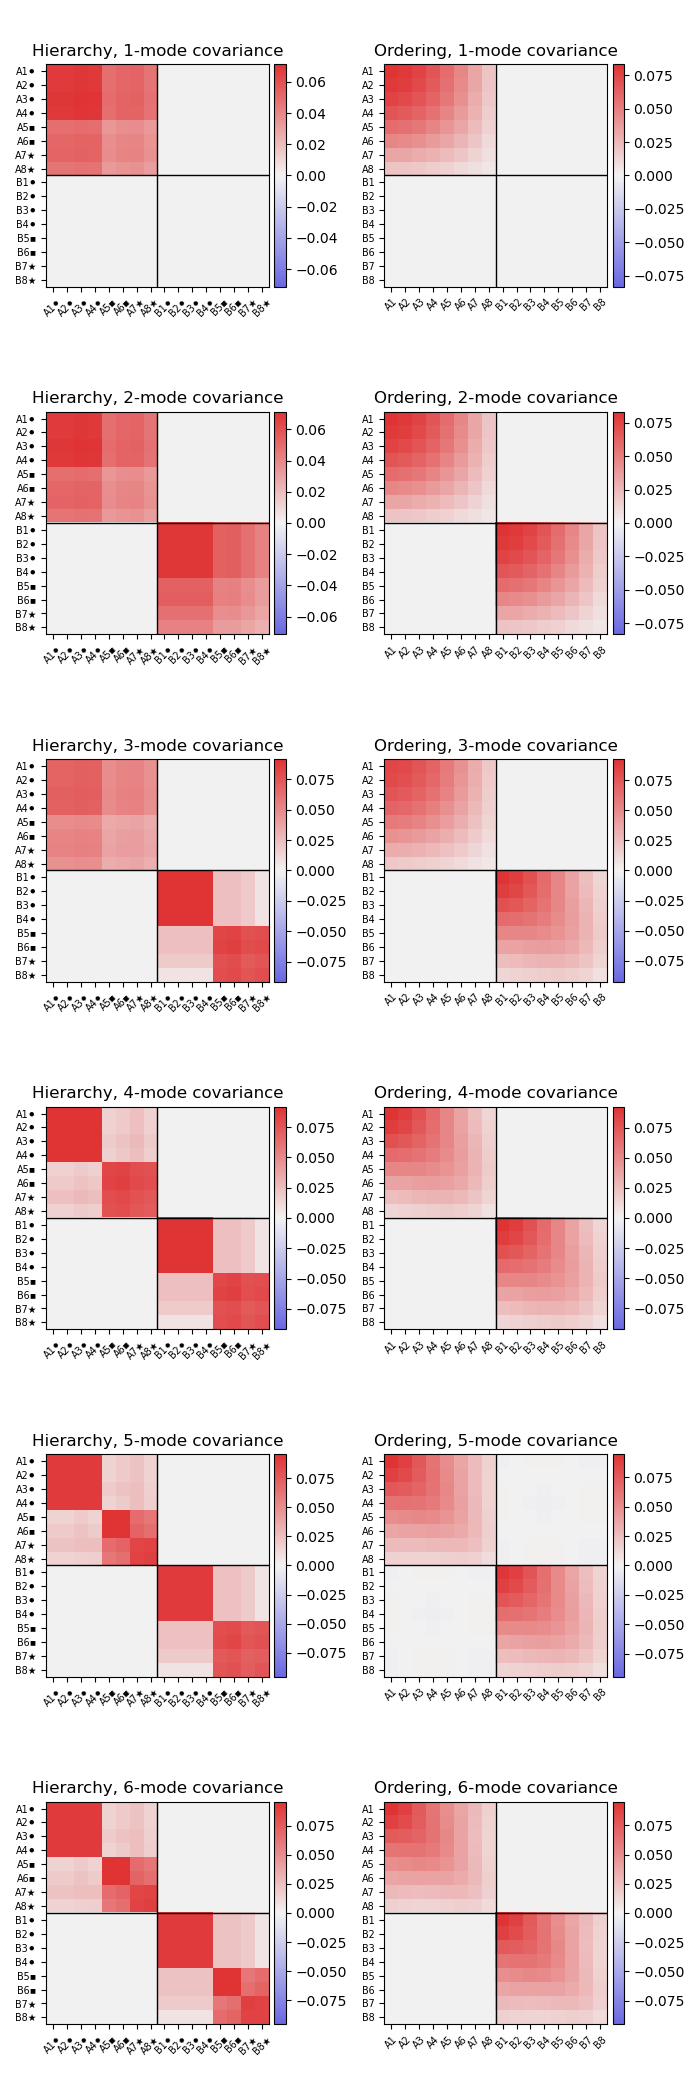

In [60]:
# Plot ground truth iomat correlations for subsets of SVD components
n_compss = range(1, 7)

fig, axss = util.auto_subplots(len(n_compss), n_curr, ax_dims=(3.5, 3.5))
axss = axss.T

def get_subcorr_mat(item_mat, attr_mat, n_modes):
    # if n_modes == 1:
    #     # can't use correlation with just 1 component
    #     svd_loading_mat = pa.get_item_svd_loadings(item_mat, attr_mat, 1, center=False)
    #     svd_loading_subcorr = np.abs(svd_loading_mat - svd_loading_mat.T)
    # else:
    svd_loading_subcorr = pa.get_contextfree_item_svd_covar(item_mat, attr_mat, 1, range(n_modes))
    return svd_loading_subcorr

for (res_name, res), axs in zip(curr_sets.items(), axss):
    n_domains = res['net_params']['n_train_domains']
    label = res_name.split()[-1]  # Just trained-on domain
    
    # Since we can, here we average corr mats over runs
    # update: let's not do this, since run-to-run differences can obscure things.
    this_item_mat, _, this_attr_mat = dd.make_io_mats(**{**res['net_params'], 'last_domain_cluster_info': None, 'n_domains': n_domains})
    n_items = this_item_mat.shape[1]
    
    for ax, n_comps in zip(axs, n_compss):
       
        item_corr = get_subcorr_mat(this_item_mat, this_attr_mat, n_comps)
            
        dda.plot_matrix_with_input_labels(ax, item_corr, 'item', res, tick_fontsize='x-small')
        description = 'covariance' # 'abs. difference' if n_comps == 1 else 'correlation'
        ax.set_title(f'{label}, {n_comps}-mode {description}')
        
        # domain dividers
        items_per = dd.ITEMS_PER_DOMAIN
        for divider_pt in np.arange(items_per-0.5, n_items-0.5, items_per):
            ax.plot(ax.get_xlim(), [divider_pt, divider_pt], 'k', lw=1)
            ax.plot([divider_pt, divider_pt], ax.get_ylim(), 'k', lw=1)
            
fig.tight_layout()
plt.show()

# util.print_svg(fig, 'figures/hierarchy_ordering/svd_mode_corrs.svg')

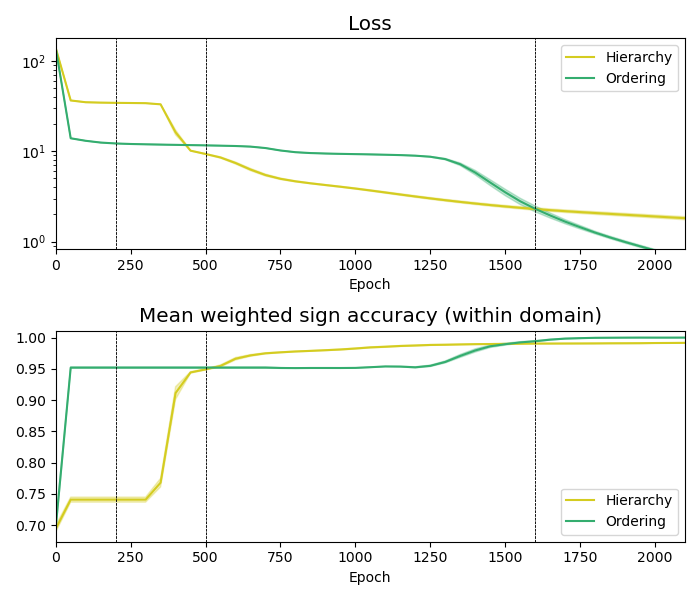

In [10]:
# Plot loss, accuracy, and test accuracy
plot_types = ['loss', 'weighted_acc_loose_indomain'] # 'weighted_acc',
              #'weighted_acc_loose_indomain', 'test_weighted_acc', 'test_weighted_acc_loose']
plot_types = list(filter(lambda t: t in next(iter(curr_sets.values()))['reports'], plot_types))

fig, axs = util.make_plot_grid(len(plot_types),
                               1, ax_dims=(7, 3),
                               ravel=True, prop_cycle=col_cycle)

epochs_of_interest = np.array([0, 200, 500, 1600]) # np.array([0, 300, 500, 1600])  # to mark on the plots

for i, (label, res) in enumerate(curr_sets.items()):
    name = re.search(r'(\w+)$', label).group(1)
    col = color_map[name.lower()]
    
    for ax, ptype in zip(axs, plot_types):
        if ptype == 'loss':
            ax.set_yscale('log')
        
        if ptype in res['reports']:
            dda.plot_report(ax, res, ptype, label=name, color=col)
            
            # plot epochs of interest
#             report_freq = res['train_params']['report_freq']
#             inds_of_interest = epochs_of_interest // report_freq
#             ind_vals = res['reports'][ptype][inds_of_interest]
#             ax.plot(epochs_of_interest, ind_vals, 'r', ls='none', marker=MarkerStyle('o', 'none'), mew=1)
            
            ax.set_ylim(ax.get_ylim())
            for epoch in epochs_of_interest[1:]:
                ax.plot([epoch, epoch], ax.get_ylim(), 'k--', lw=0.5)
                

for ax in axs:
    ax.legend()
    ax.set_xlim([0, 2100])
    ax.set_title(ax.get_title(), size='x-large')
# axs[0].legend()

fig.tight_layout()
plt.show()

# with mpl.rc_context({'svg.fonttype': 'none'}):
#     util.print_svg(fig, 'figures/hierarchy_saxe_ordering/ddnet_both_training.svg')

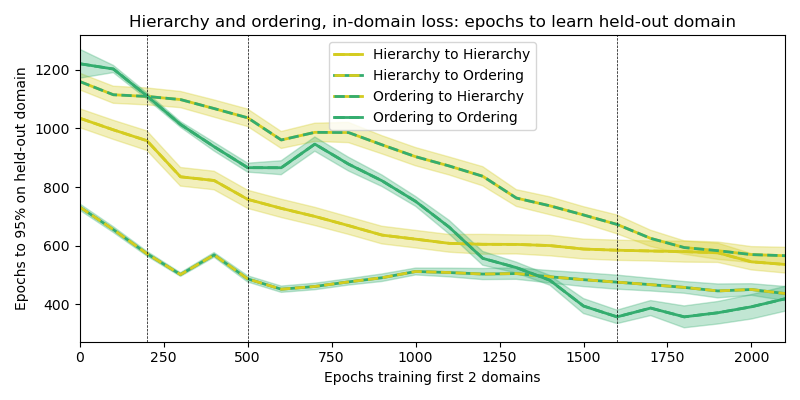

In [11]:
# Plot epochs-to-generalize, 1 plot per type of network

# colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
SEPARATE_PLOTS = False

# A little hacky: assume any value of the runs dict with a perfect square length > 1 is a train/test set of runs.
domain_holdout_runs = {key: runs for key, runs in curr_sets_nested.items() if len(runs) > 1 and np.mod(np.sqrt(len(runs)), 1) == 0}

n_types = len(domain_holdout_runs)
n_plots = sum([int(np.sqrt(len(runs))) for runs in domain_holdout_runs.values()]) if SEPARATE_PLOTS else n_types
fig, axs = util.auto_subplots(n_plots, 1, ax_dims=(8, 4))
ax_iter = iter(axs.ravel())

for (label, runs), ax in zip(domain_holdout_runs.items(), axs.ravel()):
    h_lines = [[], []]  # first held-out, then trained-on
    ax.set_title(f'{label}: epochs to learn held-out domain')
#     color_iter = iter(colors)
#     color_dict = {}
    legend_entries = []
    this_n_plots = int(np.sqrt(len(runs)))

    for krun, (name, run) in enumerate(runs.items()):
        if SEPARATE_PLOTS and krun % this_n_plots == 0:
            ax = next(ax_iter)
            h_lines = [[], []]
            legend_entries = []
            
        from_name, to_name = re.search(r'([-0-9a-zA-Z]+) (?:[-=]+>|to) ([-0-9a-zA-Z]+)', name).groups()
#         if from_name not in color_dict:
#             color_dict[from_name] = next(color_iter)
#         if to_name not in color_dict:
#             color_dict[to_name] = next(color_iter)
        
        etg_epochs = run['etg_epochs']
        mean_etg = run['reports']['etg_domain']
        ci_etg = run['report_cis']['etg_domain']
        thresh_pct = run['train_params']['test_thresh'] * 100
        trained_domains = run['net_params']['n_train_domains']

        h_lines[0].append(ax.plot(etg_epochs, mean_etg, color=color_map[to_name.lower()], ls='-', lw=2)[0])  # tested-on
        h_lines[1].append(ax.plot(etg_epochs, mean_etg, color=color_map[from_name.lower()], ls='--', lw=2)[0])  # trained-on

        ax.fill_between(etg_epochs, *ci_etg, alpha=0.3, color=color_map[to_name.lower()])

        legend_entries.append(f'{from_name} to {to_name}')
        
        if SEPARATE_PLOTS and (krun+1) % this_n_plots == 0:
            ax.legend(list(zip(*h_lines)), legend_entries)
            ax.set_xlabel(f'Epochs training first {trained_domains} domains')
            ax.set_ylabel(f'Epochs to {thresh_pct:g}% on held-out domain')

    if not SEPARATE_PLOTS:
        ax.legend(list(zip(*h_lines)), legend_entries)
    
for ax in axs.ravel():
    ax.set_xlabel(f'Epochs training first {trained_domains} domains')
    ax.set_ylabel(f'Epochs to {thresh_pct:g}% on held-out domain')
    
    curr_ylims = ax.get_ylim()
    new_ylims = (curr_ylims[0], curr_ylims[1])
    ax.set_ylim(new_ylims)    
    
    # add lines for epochs of interest
    for epoch in epochs_of_interest[1:]:
        ax.plot([epoch, epoch], new_ylims, 'k--', lw=0.5)
    
    ax.set_xlim((0, 2100))
    
fig.tight_layout()
plt.show()

# with mpl.rc_context({'svg.fonttype': 'none'}):
#     util.print_svg(fig, 'figures/hierarchy_saxe_ordering/dho_tree_ord.svg')

In [14]:
# Violin plots of ETG at epochs of interest

structure_types = ['Hierarchy', 'Ordering']
runs_name = 'Hierarchy and ordering'
epochs_to_use = epochs_of_interest[1:]

# first get data
etg_data = {}
for name, path in res_paths[runs_name].items():
    # have to handle domain 2 here since loading directly from path
    if isinstance(path, dict):
        etg_key = f'etg_domain{path["etg_domain"]}'
        path = res_paths[runs_name][path['inherit_from']]
    else:
        etg_key = 'etg_domain'
    etg_epochs = list(domain_holdout_runs[runs_name][name]['etg_epochs'])
    etg_inds = [etg_epochs.index(epoch) for epoch in epochs_to_use]
    
    with np.load(path, allow_pickle=True) as resfile:
        etg_data[name] = resfile['reports'].item()[etg_key][:, etg_inds]
        
with sns.axes_style('whitegrid'):
    sns.set_palette('tab10')
#     fig, axs = util.make_plot_grid(len(epochs_of_interest)-1, 2, ax_dims=(6, 4))
    tree_dtype = pd.CategoricalDtype(categories=structure_types, ordered=True)
    same_dtype = pd.CategoricalDtype(categories=['Same', 'Different'], ordered=True)
    epoch_dtype = pd.CategoricalDtype(categories=[str(ep) for ep in epochs_to_use], ordered=True)

    from_str = 'Trained on'
    to_str = 'Tested on'
    same_str = 'Train vs. held-out domain'
    epoch_str = 'Training epochs'
    etg_str = 'Epochs to 85% on held-out domain'
    cols = [from_str, to_str, same_str, epoch_str, etg_str]
    vplot_data = pd.DataFrame(columns=cols)
    
    for name, data in etg_data.items():
        from_name, to_name = re.search(r'([-0-9a-zA-Z]+) (?:[-=]+>|to) ([-0-9a-zA-Z]+)', name).groups()
        
        for i, epoch in enumerate(epochs_to_use):
            new_df = pd.DataFrame({from_str: from_name, to_str: to_name, same_str: 'Same',
                                   epoch_str: str(epoch), etg_str: data[:, i]})
            new_df.loc[new_df[from_str] != new_df[to_str], same_str] = 'Different'
            vplot_data = pd.concat([vplot_data, new_df])

    vplot_data[from_str] = vplot_data[from_str].astype(tree_dtype)
    vplot_data[to_str] = vplot_data[to_str].astype(tree_dtype)
    vplot_data[same_str] = vplot_data[same_str].astype(same_dtype)
    vplot_data[epoch_str] = vplot_data[epoch_str].astype(epoch_dtype)
    vplot_data[etg_str] = vplot_data[etg_str].astype(np.int32)
    
#     g = sns.catplot(kind='violin', x=to_str, y=etg_str, hue=same_str, col=epoch_str, col_wrap=2,
#                     sharey=False, data=vplot_data, inner='box')

#     g.figure.suptitle(runs_name)
#     g.tight_layout()
#     plt.show()
    # util.print_svg(fig, 'figures/ddnet_separate_violin.svg')

Epoch 200: p = 9.051203529707056e-62
Epoch 500: p = 0.0019434168616404624
Epoch 1600: p = 3.17440319080839e-08


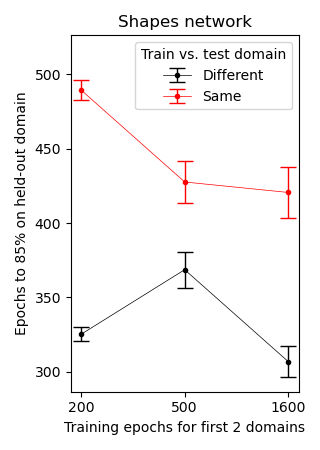

In [17]:
# Violin plots of ETG, collapsed across English/French

# with sns.axes_style('whitegrid'):
#     sns.set_palette(['white', '#AAAAAA'])
# #     fig, ax = plt.subplots(figsize=(10, 4))
#     g = sns.catplot(kind='violin', x=epoch_str, y=etg_str, hue=same_str, data=vplot_data, inner='box', legend_out=False, aspect=1.7)
#     g.set_xlabels('Training epochs on first 2 domains', size='large')
#     g.set_ylabels(g.ax.get_ylabel(), size='large')
#     g.figure.suptitle(f'Generalization test results ({runs_name.lower()})', size='x-large')
#     g.tight_layout()
#     plt.show()
    
#     with mpl.rc_context({'svg.fonttype': 'none'}):
#         util.print_svg(g.figure, 'figures/hierarchy_ordering/gen_test_violin_combined.svg')

# stick plots with standard error errorbars
fig, ax = plt.subplots(figsize=(3.2, 4.5))
diff_means = np.empty(len(epochs_to_use))
diff_ses = np.empty_like(diff_means)
same_means = np.empty_like(diff_means)
same_ses = np.empty_like(diff_means)

for i, epoch in enumerate(epochs_to_use):
    different_data = vplot_data[(vplot_data[same_str] == 'Different') & (vplot_data[epoch_str] == str(epoch))]
    diff_means[i] = np.mean(different_data[etg_str])
    diff_ses[i] = np.std(different_data[etg_str]) / np.sqrt(len(different_data))

    same_data = vplot_data[(vplot_data[same_str] == 'Same') & (vplot_data[epoch_str] == str(epoch))]
    same_means[i] = np.mean(same_data[etg_str])
    same_ses[i] = np.std(same_data[etg_str]) / np.sqrt(len(same_data))
    
    _, p = stats.ttest_ind(same_data[etg_str], different_data[etg_str])
    print(f'Epoch {epoch}: p = {p}')

ax.errorbar(range(len(epochs_to_use)), diff_means, yerr=diff_ses, fmt='k.-', capsize=6, lw=0.5, elinewidth=1, capthick=1, label='Different')
ax.errorbar(range(len(epochs_to_use)), same_means, yerr=same_ses, fmt='r.-', capsize=6, lw=0.5, elinewidth=1, capthick=1, label='Same')
ax.set_xticks(range(len(epochs_to_use)))
ax.set_xticklabels([str(epoch) for epoch in epochs_to_use])
ax.set_xlabel('Training epochs for first 2 domains')
ax.set_ylabel('Epochs to 85% on held-out domain')
ax.legend(loc='upper right', title='Train vs. test domain')
lower, upper = ax.get_ylim()
ax.set_ylim((lower, upper + 20))
ax.set_title('Shapes network')

fig.tight_layout()
plt.show()

with mpl.rc_context({'svg.fonttype': 'none'}):
    util.print_svg(fig, 'figures/hierarchy_saxe_ordering/gen_test_stick.svg')

KeyError: 'iomat_snaps'

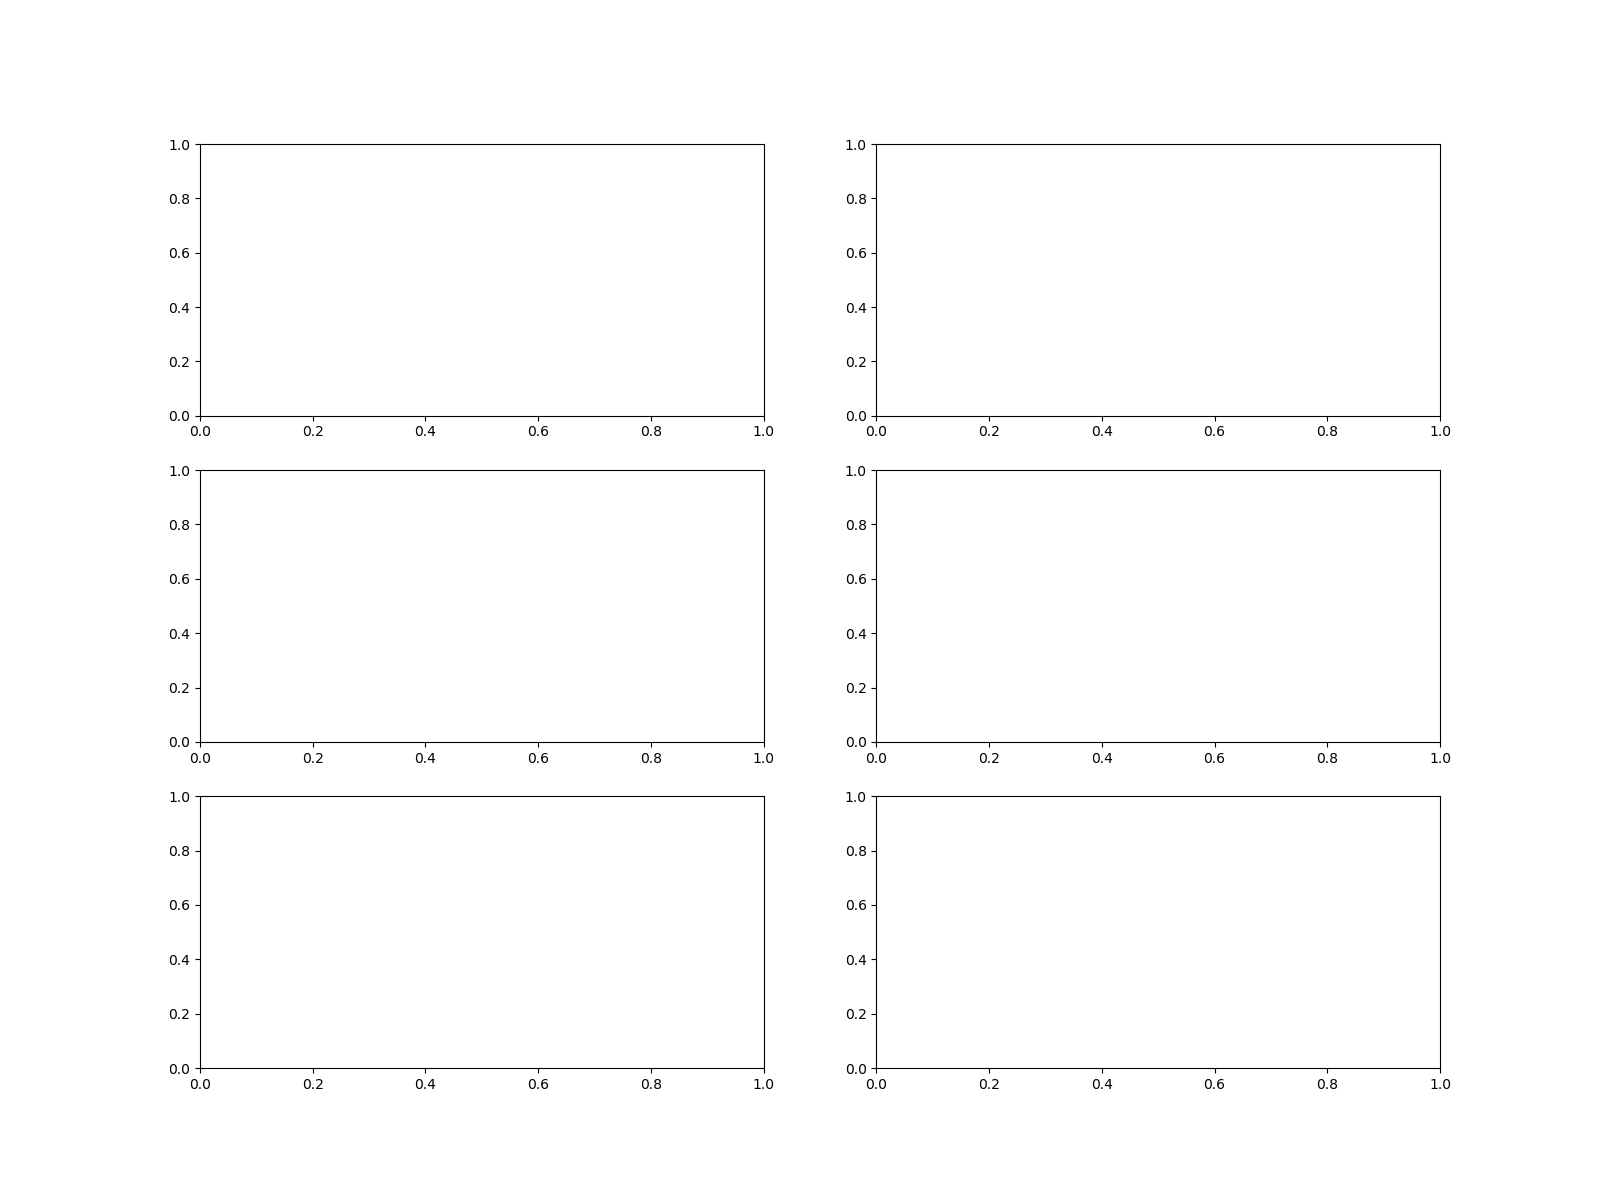

In [54]:
# SVD domain mixing scores and I/O corr ranks over training

layers = ['repr', 'hidden', 'attr']

def plot_io_corr_ranks_with_ylims(bottom, top):
    def ret_fn(ax, *args, **kwargs):
        dda.plot_io_corr_ranks(ax, *args, **kwargs)
        ax.set_ylim(bottom=bottom, top=top)
    return ret_fn

score_fns = [#dda.plot_domain_mixing_scores,
             #dda.plot_io_corr_ranks,
             plot_io_corr_ranks_with_ylims(0, 27),
             dda.plot_rank_domain_mixing_scores]
fig, axss = dda.auto_subplots(len(layers), len(score_fns), ax_dims=(8, 4), prop_cycle=prop_cycle_pairs)

for axs, layer in zip(axss, layers):
    for ax, fn in zip(axs, score_fns):
        for i, (label, res) in enumerate(curr_sets.items()):
            if layer + '_preact' in res['iomat_snaps']:
                fn(ax, res, label=f'{label} pre-act', layer=(layer + '_preact'))
            if layer in res['iomat_snaps']:
                fn(ax, res, label=f'{label} post-act', layer=layer)
        dda.outside_legend(ax)
        
# dda.outside_legend(ax)

fig.tight_layout()
plt.show()

In [10]:
# Plot hypothesized item distance measures on training data that representation distances may correspond to
dist_fns = [dda.get_svd_dist_mats, dda.get_attr_freq_dist_mats]
dist_fn_names = ['SVD mode distance', 'Mean attr freq difference']

fig, axss = dda.auto_subplots(len(dist_fns), n_curr)
fig.suptitle('Hypothesized item distance metrics')

for fn, fn_name, axs in zip(dist_fns, dist_fn_names, axss):
    for (label, res), ax in zip(curr_sets.items(), axs):
        dist_mats = fn(res)
        input_names = dda._get_names_for_snapshots('item', **res['net_params'])
        im = dda.plot_matrix_with_labels(ax, np.mean(dist_mats, axis=0), input_names)
        ax.set_title(f'{fn_name}\n({label})')
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontsize('x-small')

fig.tight_layout(rect=(0, 0, 1, 0.98))
# fig.canvas.layout.width = '1300px'
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [42]:
# axs[2].set_xscale('log')
# axs[2].get_legend().remove()
# ylims = axs[2].get_ylim()
# snap_epochs = curr_sets['Original']['snap_epochs']
# for ind in [0, 1, 5, 10, 50, 100]:
#     epoch = snap_epochs[ind]
#     axs[2].plot([epoch, epoch], ylims, 'k--')

# plt.show()

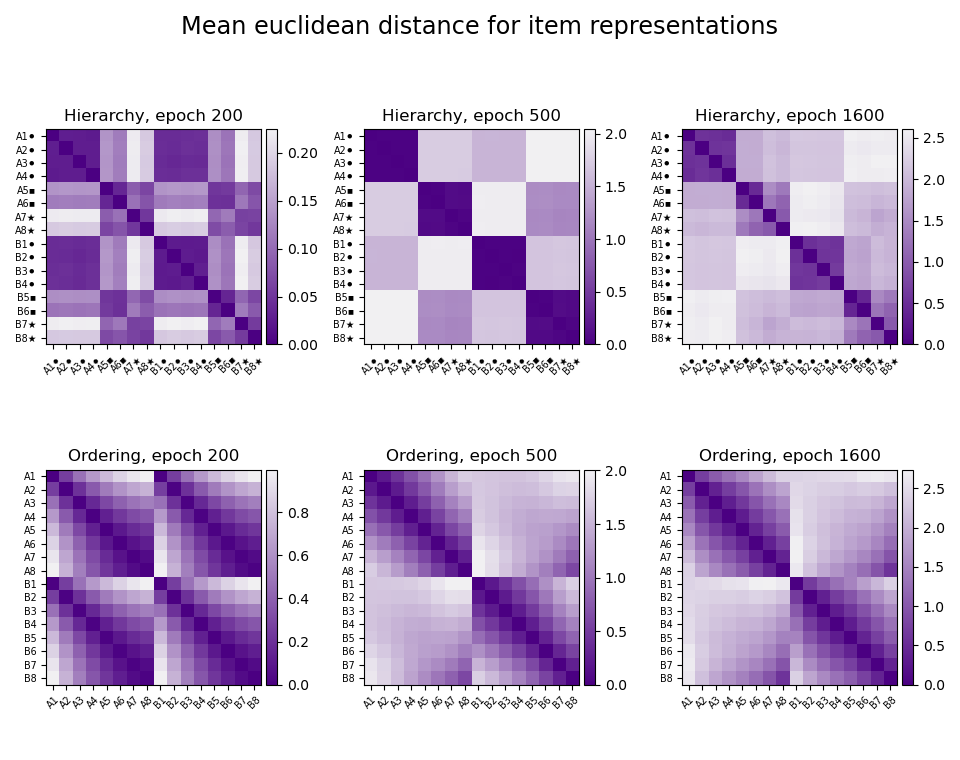

In [18]:
# Item RSA matrices

# this and commented parts are for plotting just one run rather than the mean
# run_num = 0
plot_type = 'dist'

inds_to_plot = np.arange(0, 40, 2)
epochs_to_plot = epochs_of_interest[1:]

# layers = ['item', 'item_hidden']
r = 'representations'
layer_names = {'item': 'item ' + r, 'item_hidden': 'item hidden-layer ' + r, 'item_hidden_preact': 'item hidden-layer pre-activation ' + r,
               'item_full': 'full item ' + r, 'item_preact': 'pre-activation item ' + r, 'attr': 'attributes', 'attr_preact': 'pre-activation attributes'}

layer = 'item'
# fig, axss = util.auto_subplots(len(inds_to_plot), n_curr, ax_dims=(3,3))
# fig, axss = util.auto_subplots(len(layers), len(inds_to_plot))
fig, axss = util.auto_subplots(n_curr, len(epochs_to_plot), ax_dims=(3.2, 3.8))  # horizontal orientation
axss = axss.T

corr_types = {
    'covar': 'non-centered covariance',
    'covar_centered': 'centered covariance',
    'pearson': 'Pearson correlation'
}

if plot_type == 'corr':
    fig.suptitle(f'Mean correlation of {layer_names[layer]} (sigmoid, {corr_types[load_settings["corr_type"]]})', size='xx-large')
else:
    fig.suptitle(f'Mean {load_settings["dist_metric"]} distance for {layer_names[layer]}', size='xx-large') #, run {run_num}')

# for layer, axs in zip(layers, axss):
# for ind, axs in zip(inds_to_plot, axss):
for epoch, axs in zip(epochs_to_plot, axss):
    for (label, res), ax in zip(curr_sets.items(), axs):
        ind = epoch // res['train_params']['snap_freq']
        res = curr_sets[label]
#     for layer, ax in zip(layers, axs):
        if ind < len(res['snap_epochs']):
            label = re.search(r'(\w+)$', label).group(1)
            plot_fn = dda.plot_repr_corr if plot_type == 'corr' else dda.plot_rdm
            plot_fn(ax, res, layer, ind, fix_range=False) #colorbar=False)
                    #  actual_mat=res['repr_corr'][layer]['snaps_each'][run_num, ind])
            ax.set_title(f'{label}, epoch {epoch}')

fig.tight_layout(rect=(0, 0, 1, 0.98))
plt.show()
util.print_svg(fig, 'figures/hierarchy_saxe_ordering/item_repr_dists.svg')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
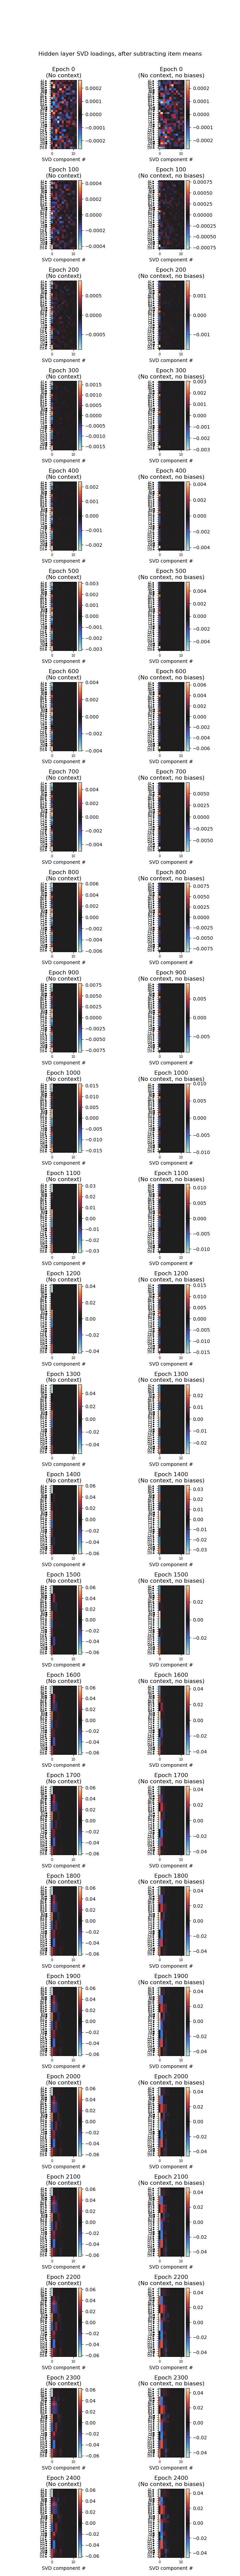

In [55]:
# SVD loading matrices

run_num = 0
inds_to_plot = np.arange(0, 50, 2)
n_modes = 12
layer = 'repr'
center = False

fig, axss = dda.auto_subplots(len(inds_to_plot), n_curr, ax_dims=(3.5, 3))
for ind, axs in zip(inds_to_plot, axss):
    for (label, res), ax in zip(curr_sets.items(), axs):
        res = curr_sets[label]
        if ind < len(res['snap_epochs']):
            dda.plot_item_svd_loadings(ax, res, ind, run_num, n_modes=n_modes, title_addon=label,
                                       layer=layer, center=center)

            # uncomment below to average loadings across runs
#             loadings = np.stack([u @ np.diag(s) for u, s in [
#                 dda.get_item_loadings_svs_and_scores(res, ind, run_ind, layer=layer, n_modes=n_modes, center=center)[:2] for run_ind in range(res['ys'].shape[0])
#             ]])
#             dda.plot_matrix_with_input_labels(ax, np.mean(loadings, axis=0), 'item', res, colorbar=True, label_cols=False, tick_fontsize='x-small')
#             ax.set_title(f'Epoch {res["snap_epochs"][ind]}\n({label})')

title = 'Hidden layer SVD loadings'
if center:
    title += ', after subtracting item means'

fig.suptitle(title)
fig.tight_layout(rect=(0, 0, 1, 0.98))
plt.show()

In [42]:
# SVD loadings onto attributes

run_num = 0
inds_to_plot = np.arange(0, 200, 5)
n_modes = 12

fig, axss = dda.auto_subplots(len(inds_to_plot), n_curr, ax_dims=(5,3))
for ind, axs in zip(inds_to_plot, axss):
    for (label, res), ax in zip(curr_sets.items(), axs):
        res = curr_sets[label]
        if ind < len(res['snap_epochs']):
            dda.plot_item_svd_scores(ax, res, ind, run_num, n_modes=n_modes, title_addon=label, weighted=True, center=True)
            
fig.tight_layout(rect=(0, 0, 1, 0.98))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [61]:
# Look at decomposition of I/O matrix into modes at specific epoch
nmodes = 12
epoch_ind = 190
run_ind = 0

fig, axs = dda.make_plot_grid(nmodes, ax_dims=(5, 4))
res = curr_sets['Linear, 2HL']
u, s, vd = dda.get_item_loadings_svs_and_scores(res, epoch_ind, run_ind)

for mode, ax in enumerate(axs):
    mode_mat = s[mode] * np.outer(u[:, mode], vd[mode, :])
    im = dda.plot_matrix_with_input_labels(ax, mode_mat, 'item', res=res, label_cols=False, aspect='auto')
    ax.set_title(f'Mode {mode}')
    ax.set_xlabel('Atribute')
    dda.add_colorbar(im)

fig.suptitle(f'Run {run_ind+1}, epoch {res["snap_epochs"][epoch_ind]}')
fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [34]:
# Plot regressors for quantitative analysis of item correlations
dist_fns = [lambda x: dda.get_svd_dist_mats(x, normalize=True),
            lambda x: dda.get_attr_freq_dist_mats(x, normalize=True) - dda.get_svd_dist_mats(x, normalize=True)]
dist_fn_names = ['SVD mode distance (normalized)', 'Attr freq difference (normalized) - \n SVD mode distance (normalized)']

fig, axss = dda.auto_subplots(len(dist_fns), n_curr)
fig.suptitle('Item distance regressors')

for fn, fn_name, axs in zip(dist_fns, dist_fn_names, axss):
    for (label, res), ax in zip(curr_sets.items(), axs):
        dist_mats = fn(res)
        input_names = dda._get_names_for_snapshots('item', **res['net_params'])
        im = dda.plot_matrix_with_labels(ax, np.mean(dist_mats, axis=0), input_names)
        ax.set_title(f'{fn_name}\n({label})')
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontsize('x-small')

fig.tight_layout(rect=(0, 0, 1, 0.98))
fig.canvas.layout.width = '1300px'
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0.98, 'Attribute frequency distance')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
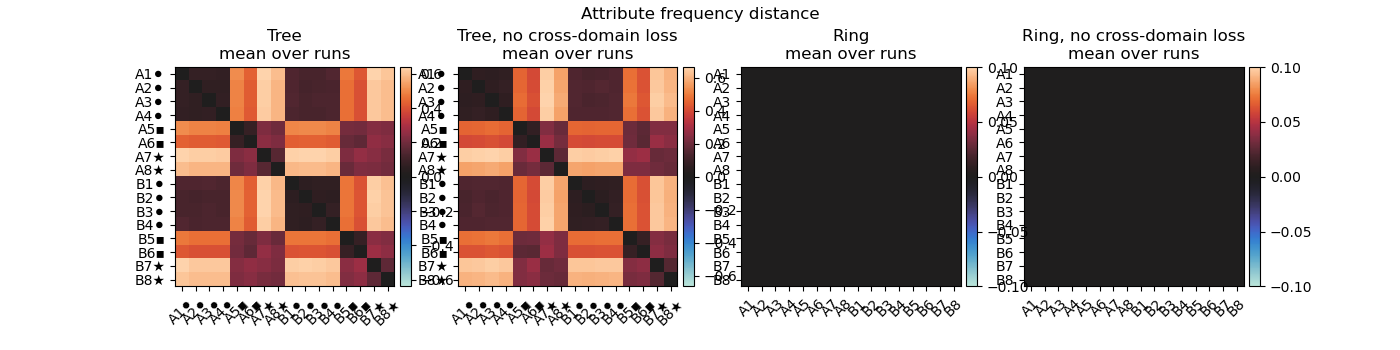

In [125]:
# Show attribute frequency measure (to compare to above RDMs)
run_num = 0

fig, axs = dda.make_plot_grid(n_curr, n_curr, ax_dims=(3.5, 3.5))
for (label, res), ax in zip(curr_sets.items(), axs):
    train_items = slice(dd.ITEMS_PER_DOMAIN * res['net_params']['n_train_domains'])
    attr_freq_dist = dda.get_attr_freq_dist_mats(res, train_items=train_items)
    # dda.plot_matrix_with_input_labels(ax, attr_freq_dist[run_num], 'item_full', res)
    # ax.set_title(f'{label}, run {run_num}')
    dda.plot_matrix_with_input_labels(ax, np.mean(attr_freq_dist, axis=0), 'item_full', res)
    ax.set_title(f'{label}\nmean over runs')
    
fig.suptitle('Attribute frequency distance')

In [152]:
# Try correlating attribute frequency measure to RDMs
fig, ax = plt.subplots(figsize=(8, 4))
for label, res in curr_sets.items():
    dda.plot_attr_freq_dist_correlation(ax, res, label=label, train_items=train_items)
    
ax.set_xlim([0, 2001])
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [47]:
# Dendrograms for just original
fig, axs = dda.auto_subplots(1, len(inds_to_plot), ax_dims=(4.5, 3.5))
for ind, ax in zip(inds_to_plot, axs.ravel()):
    dda.plot_repr_dendrogram(ax, curr_sets['Original'], 'item', ind)
    
fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
# Corresponding dendrograms
fig, axss = dda.auto_subplots(len(inds_to_plot), n_curr, ax_dims=(4, 3))
fig.suptitle('Item representation similarity')

for ind, axs in zip(inds_to_plot, axss):
    for (label, res), ax in zip(curr_sets.items(), axs):
        dda.plot_repr_dendrogram(ax, res, 'item_hidden', ind, title_addon=label)

fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
# Look at RSA projections onto group, domain, and item models
# First plot the models
item_models = dda.make_ortho_item_rsa_models(**next(iter(curr_sets.values()))['net_params'])

fig, axs = dda.auto_subplots(1, (len(item_models)), ax_dims=(3.4, 3.4))
for ax, (mtype, model) in zip(axs.ravel(), item_models.items()):
    dda.plot_matrix_with_input_labels(ax, model, 'item')
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize('x-small') 
    ax.set_title(mtype + ' model RDM')
    
# fig.canvas.layout.width = '1300px'
fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AssertionError: Wrong number of labels

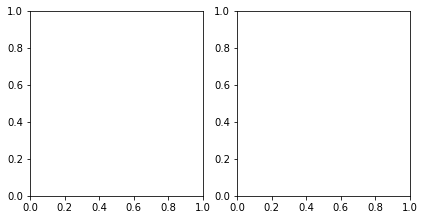

In [12]:
# Context hidden layer projections
# First plot models
ctx_models = dda.make_ortho_context_rsa_models(**next(iter(curr_sets.values()))['net_params'])

fig, axs = dda.auto_subplots(1, len(ctx_models), ax_dims=(3.4, 3.4))
for ax, (mtype, model) in zip(axs.ravel(), ctx_models.items()):
    dda.plot_matrix_with_input_labels(ax, model, 'context')
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize('x-small') 
    ax.set_title(mtype + ' model RDM')
    
fig.tight_layout()
plt.show()

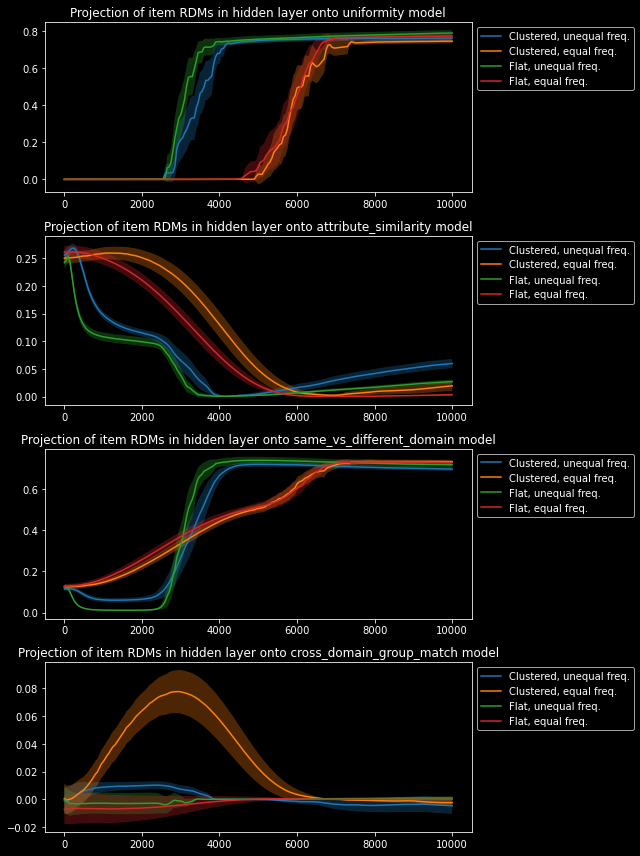

In [27]:
def plot_snap_projections(snap_type):
    n_plots = len(item_models) if 'item' in snap_type else len(ctx_models)
    fig, axs = dda.make_plot_grid(n_plots, 1, ax_dims=(9, 3),
                                  ravel=True, prop_cycle=prop_cycle)

    for label, res in curr_sets.items():
        if snap_type in res['repr_dists']:
            dda.plot_rdm_projections(res, snap_type, axs, label=label)

    for ax in axs:
        dda.outside_legend(ax)

    fig.tight_layout()
    plt.show()

# Item hidden layer projections
plot_snap_projections('item_hidden')

C:\Users\ethan\.conda\envs\cuda11\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ethan\.conda\envs\cuda11\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


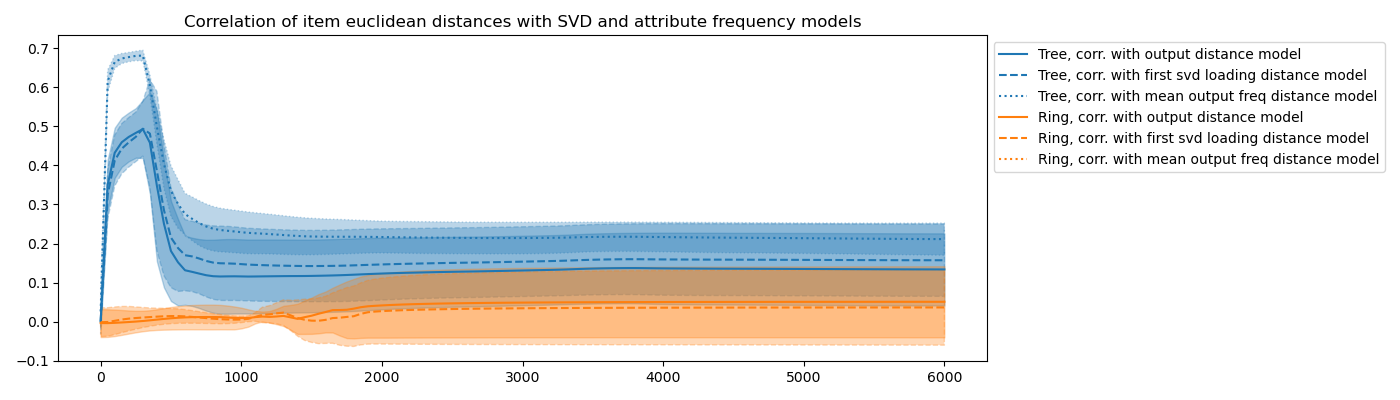

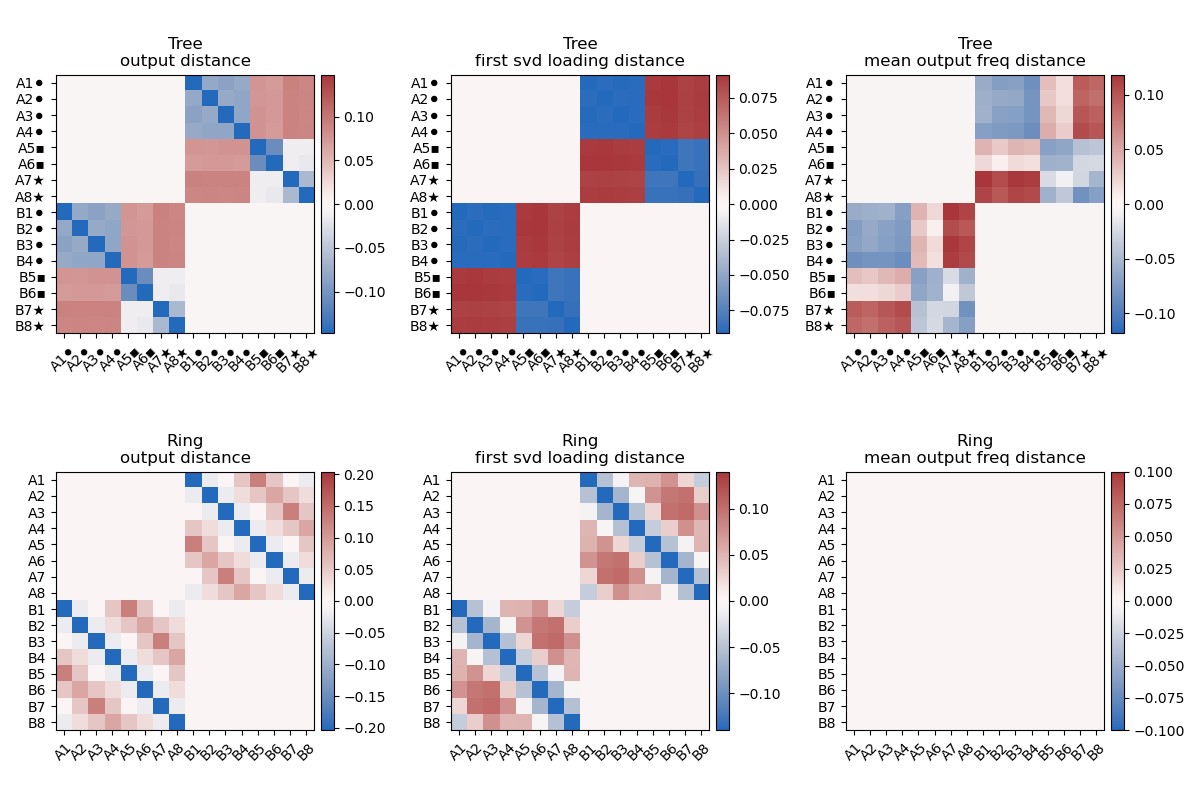

In [38]:
# Try correlating each 2x2 item repr corr matrix with individual SVD and/or attr freq distance, as applicable
colors = [d['color'] for d in list(col_cycle)]
linestyles = ['-', '--', ':']

model_names = {
    'svd': 'output distance',
    'svd_first': 'first svd loading distance',
    'attr_freq': 'mean output freq distance'
}

corr_names = {
    'pearson': 'Correlation',
    'spearman': 'Spearman\'s r',
    'kendall': 'Kendall\'s tau'
}

corr_type = 'pearson'
snap_type = 'item'

def get_model_corrs(res, svd=True, attr_freq=True):
    n_train_domains = res['net_params']['n_train_domains']
    train_items = np.arange(dd.ITEMS_PER_DOMAIN * n_train_domains)
    
    def get_svd_dist_model(modes_to_use):
        """
        Get model that expects off-diagonal blocks to resemble the average SVD distance matrix over all domains
        Now returns a 3D array with a separate model for each run.
        """
        domain_svd_dists = [dda.get_svd_dist_mats(res, this_domain_items, modes_to_use, normalize=True, n_domains=1)
                            for this_domain_items in np.split(train_items, n_train_domains)]
        # average over trained_domains (still individual for each run)
        mean_svd_dists = np.mean(domain_svd_dists, axis=0)
        # tile over full set of trained items (block diagonal will be zeroed later)
        return np.tile(mean_svd_dists, (1, n_train_domains, n_train_domains))
        
    models = dict()
    if svd:
        models['svd'] = get_svd_dist_model(slice(None))
        models['svd_first'] = get_svd_dist_model([0])

    if attr_freq:
        models['attr_freq'] = np.stack([util.center_and_norm_rdm(mat)
                                        for mat in dda.get_attr_freq_dist_mats(res, train_items)])
        
    # set all block diagonal entries to zero - we want to focus on the off-diagonal entries
    offdiag_mask = train_items[np.newaxis, :] // dd.ITEMS_PER_DOMAIN != train_items[:, np.newaxis] // dd.ITEMS_PER_DOMAIN
    for model_name in models:
        models[model_name] = np.where(offdiag_mask, models[model_name], 0)
        models[model_name] = util.center_and_norm_rdm(models[model_name])

    return models, net_analysis.get_rdm_projections(res, snap_type, models, corr_type=corr_type)

def plot_corr_ci(ax, res, corr, label, color, style):
    mean, (lower, upper) = util.get_mean_and_ci(corr)
    ax.plot(res['snap_epochs'], mean, label=label, color=color, linestyle=style)
    ax.fill_between(res['snap_epochs'], lower, upper, alpha=0.3, color=color, linestyle=style)

# For matrix plots of models
fig1, model_axss = util.auto_subplots(len(curr_sets), len(model_names))

fig2, ax2 = plt.subplots(figsize=(14, 4))
ax2.set_title(f'{corr_names[corr_type]} of {snap_type} {load_settings["dist_metric"]} ' +
              'distances with SVD and attribute frequency models')

for (res_name, res), col, model_axs in zip(curr_sets.items(), colors, model_axss):
    models, res_corrs = get_model_corrs(res, svd=True, attr_freq=True) 
    for (model_type, model), ls, model_ax in zip(models.items(), linestyles, model_axs):
        dda.plot_matrix_with_input_labels(model_ax, np.mean(model, axis=0), snap_type, res)
        model_ax.set_title(f'{res_name}\n{model_names[model_type]}')
        
        plot_corr_ci(ax2, res, res_corrs[model_type], res_name + f', corr. with {model_names[model_type]} model', col, ls)

util.outside_legend(ax2)
fig1.tight_layout()
fig2.tight_layout()
plt.show()

In [88]:
# Item representation layer projections
plot_snap_projections('item')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
# All layers item projection
plot_snap_projections('item_full')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [90]:
# Context hidden layer projections
plot_snap_projections('context_hidden')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [91]:
# Context representation layer projections
plot_snap_projections('context')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [88]:
# All layers context projection
plot_snap_projections('context_full')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
# special analysis of projections onto cross_domain_group_match model to look at batch size
batch_sizes = np.array([res['train_params']['batch_size'] for res in curr_sets.values()])
projections = np.stack([np.mean(dda.get_rdm_projections(res, snap_type='item_full')['cross_domain_group_match'], axis=0)
                        for res in curr_sets.values()])

fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(projections)
ax.set_title('Strength of cross-domain (checkerboard) pattern')
ax.set_yticks(range(projections.shape[0]))
ax.set_yticklabels(batch_sizes)
ax.set_ylabel('Batch size')
ax.set_xticks(range(0, projections.shape[1], 4))
ax.set_xticklabels(curr_sets['B5']['snap_epochs'][::4])
ax.set_xlabel('Training epoch')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [100]:
# Fit linear models
reg_data = dda.make_dict_for_regression(curr_sets.values())

In [94]:
# Fit model for context domain information interacting with item domain and attribute similarity (both potentially important)
model1_res = dda.fit_linear_model('test_weighted_acc ~ ctx_same_vs_different_domain*(item_attribute_similarity + item_same_vs_different_domain)', reg_data)
print(model1_res.summary())

                            OLS Regression Results                            
Dep. Variable:      test_weighted_acc   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     5971.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:46:18   Log-Likelihood:                 21863.
No. Observations:               18180   AIC:                        -4.371e+04
Df Residuals:                   18174   BIC:                        -4.367e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [101]:
model2_res = dda.fit_linear_model('test_weighted_acc ~ item_attribute_similarity + ctx_same_vs_different_domain', reg_data)
print(model2_res.summary())

                            OLS Regression Results                            
Dep. Variable:      test_weighted_acc   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     7451.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:36:17   Log-Likelihood:                 18472.
No. Observations:               18180   AIC:                        -3.694e+04
Df Residuals:                   18177   BIC:                        -3.691e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
# TODO: Try plotting a combination of item attribute similarity and context domain measures? Not sure if it makes sense.

In [74]:
# Context RSA matrix
inds_to_plot = [0, 1, 4, 11, 12, 30, 50, -1]
fig, axss = dda.auto_subplots(len(inds_to_plot), n_curr, ax_dims=(4, 4))
fig.suptitle('Mean RSA for contexts')

#ctx_sets = {name: res for name, res in curr_sets.items() if name in ['Original', 'Merged repr', 'No item repr']}

for ind, axs in zip(inds_to_plot, axss):
    for (label, res), ax in zip(curr_sets.items(), axs):
        dda.plot_rsa(ax, res, 'context_hidden', ind, title_addon=label, item_order='domain-inner')

fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [60]:
# Corresponding context dendrograms
fig, axss = dda.auto_subplots(len(inds_to_plot), n_curr, ax_dims=(4, 3))
fig.suptitle('Context representation similarity')

for ind, axs in zip(inds_to_plot, axss):
    for (label, res), ax in zip(curr_sets.items(), axs):
        dda.plot_repr_dendrogram(ax, res, 'context', ind, title_addon=label)

fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [79]:
# Item rep RSA over all snapshots (useful maybe for finding interesting change points)
fig, axs = dda.make_plot_grid(len(curr_sets), 2, ax_dims=(5, 5))

for ax, (label, res) in zip(axs, curr_sets.items()):
    n_snaps = len(res['snap_epochs'])
    snap_freq = res['train_params']['snap_freq']
    im = ax.imshow(res['repr_dists']['item']['all'],
                   extent=(-0.5, n_snaps * snap_freq-0.5, n_snaps * snap_freq-0.5, -0.5))
    ax.set_xticks(res['snap_epochs'][::4])
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_yticks(res['snap_epochs'][::4])
    ax.set_xlabel('Epochs')
    ax.set_title(f'Item repr distances over training ({label})')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

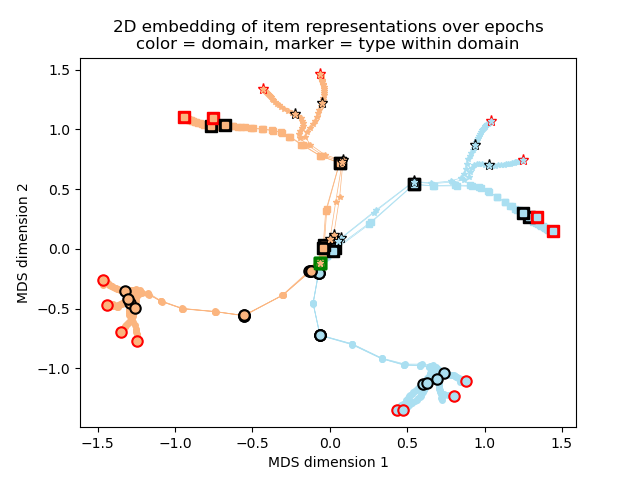

In [31]:
# MDS of item representations over time
for label, res in curr_sets.items():
    fig, ax = dda.plot_repr_trajectories(res, 'item', dims=2, title_label=label, epochs_to_mark=[300, 400, 1000])

ax.set_xlabel('MDS dimension 1')
ax.set_ylabel('MDS dimension 2')
ax.set_title('2D embedding of item representations over epochs\ncolor = domain, marker = type within domain')
plt.show()
util.print_svg(fig, 'figures/ddnet_repr_trajs.svg')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
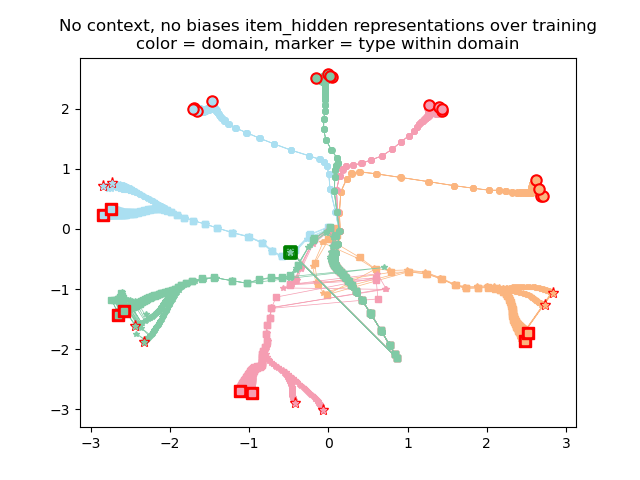

In [45]:
for label, res in curr_sets.items():
    dda.plot_repr_trajectories(res, 'item_hidden', dims=3, title_label=label)

plt.show()

In [48]:
import importlib
importlib.reload(dda)

fig, axs = dda.make_plot_grid(len(curr_runs), 2, ax_dims=(6, 15))
run_num = 0
snap_index = 5

for (name, res), ax in zip(short_sets.items(), axs.ravel()):
    dda.plot_hl_input_pattern_correlations(ax, res, run_num, snap_index, title_label=name)
    
fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

SVs:  [0.65084126 0.64436444 0.52421517 0.50663666 0.23340724 0.21272456
 0.14124074 0.13831867 0.08838835 0.08838835 0.08838835 0.08838835
 0.08752221 0.08486669 0.06098941 0.05978291]
SVs:  [0.60929556 0.60929556 0.20460884 0.20460884 0.12479624 0.12479624
 0.09162733 0.09162733 0.07420774 0.07420774 0.06413817 0.06413817
 0.05823971 0.05823971 0.05511003 0.05511003]


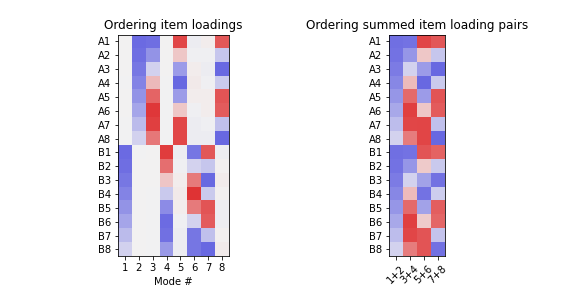

In [27]:
# Make expected trajectories of modes, along with plots of each mode (as in Saxe et al.)
# Take a0s from absolute value of empirical ones at start of training, even though this probably isn't really valid

n_modes = 8
ls_cycle = cycler(ls=['-', '--']) * (n_modes // 2)
full_cycle = col_cycle[:n_modes] + ls_cycle

domain_types = ['Hierarchy', 'Ordering']
fig, mode_traj_axss = util.auto_subplots(5, len(domain_types), ax_dims=(6, 3), prop_cycle=full_cycle)
mode_traj_axss = mode_traj_axss.T

mode_corr_figs = []
item_loading_figs = []

res_dict = {domtype: {} for domtype in domain_types}
for name, res in curr_sets.items():
    domtype = re.search(r'to (\w+)$', name).group(1)
    subtype = 'linear' if re.search('linear', name) else 'sigmoid'
    res_dict[domtype][subtype] = res

for (domain_name, runs), axs in zip(res_dict.items(), mode_traj_axss):
    a0s = np.mean(np.abs(runs['linear']['attr_iomat_a_all'][:, :, 0]), axis=0)
    
    train_net_params = {**runs['linear']['net_params'],
                        'n_domains': runs['linear']['net_params']['n_train_domains'],
                        'last_domain_cluster_info': None}
    item_mat, _, attr_mat = dd.make_io_mats(**train_net_params)
    
    # make figure showing individual SV covariance components
    fig2, axss2 = util.auto_subplots(n_modes // 2, 3, ax_dims=(4, 4))
    mode_corr_figs.append(fig2)
    basis_mats = pa.get_io_corr_basis_mats_and_svs(item_mat, attr_mat)[0]
    
    for kmode, (mat, ax2) in enumerate(zip(basis_mats, axss2[:, :2].ravel())):
        mat_centered = mat - np.mean(mat, axis=0, keepdims=True)
        mode_covar = mat_centered.T @ mat_centered
        dda.plot_matrix_with_input_labels(ax2, mode_covar, 'item', runs['linear'])
        ax2.set_title(f'Mode {kmode+1}')
    
    # sums of modes
    io_corr_mat = pa.get_contextfree_io_corr_matrix(item_mat, attr_mat)
    u, s, vh = pa.corr_mat_svd(io_corr_mat, center=False)
    print('SVs: ', s)
    u_pairs, vh_pairs = pa.combine_sv_mode_groups_aligning_items(u, vh, n_domains=2)
    pair_basis = np.einsum('ij,jk->jik', u_pairs, vh_pairs)
    
    for kpair, (basis_mat_combined, ax2) in enumerate(zip(pair_basis, axss2[:, 2])):
        combined_centered = basis_mat_combined - np.mean(basis_mat_combined, axis=0, keepdims=True)
        combined_covar = combined_centered.T @ combined_centered
        dda.plot_matrix_with_input_labels(ax2, combined_covar, 'item', runs['linear'])
        ax2.set_title(f'Mode {2*kpair+1} + Mode {2*kpair+2}')
    
    fig2.suptitle(f'{domain_name} mode covariances', size='xx-large')
    fig2.tight_layout()
    util.print_svg(fig2, f'figures/hierarchy_saxe_ordering/modes_{domain_name}.svg')
    
    # plot loadings (regular and paired)
    fig3, axs3 = util.make_plot_grid(2, 2)
    item_loading_figs.append(fig3)
    input_labels = dda._get_names_for_snapshots('item', **train_net_params)
    
    util.imshow_centered_bipolar(axs3[0], vh[:n_modes].T)
    axs3[0].set_yticks(range(vh.shape[1]))
    axs3[0].set_yticklabels(input_labels)
    axs3[0].set_xticks(range(n_modes))
    axs3[0].set_xticklabels([str(n+1) for n in range(n_modes)])
    axs3[0].set_xlabel('Mode #')
    axs3[0].set_title(f'{domain_name} item loadings')
    
    util.imshow_centered_bipolar(axs3[1], vh_pairs[:n_modes//2].T)
    axs3[1].set_yticks(range(vh.shape[1]))
    axs3[1].set_yticklabels(input_labels)
    axs3[1].set_xticks(range(n_modes//2))
    axs3[1].set_xticklabels([f'{n*2+1}+{n*2+2}' for n in range(n_modes//2)])
    axs3[1].tick_params(axis='x', labelrotation=45)
    axs3[1].set_xlabel('Mode pair #')
    axs3[1].set_title(f'{domain_name} summed item loading pairs')
    util.print_svg(fig3, f'figures/hierarchy_saxe_ordering/loadings_{domain_name}.svg')
    
    tau = 2.2 / (len(item_mat) * runs['linear']['train_params']['lr'])
    n_epochs = 2500  
    pa.plot_sv_trajectories(axs[0], item_mat, attr_mat, a0s, tau, n_epochs, modes_to_use=range(n_modes))
    axs[0].set_title(f'{domain_name} - expected effective SVs')
    axs[0].set_xlabel('Time (a.u.)')
    axs[0].set_xticks([])
    
    # On second and third plots, plot reports of the empirical projections onto each mode
    for subtype, ax in zip(['linear', 'sigmoid'], axs[1:3]):
        res = runs[subtype]
        for kmode in range(n_modes):
            dda.plot_report(ax, res, f'attr_iomat_a{kmode}', label=f'Mode {kmode+1}', title=f'{domain_name} - empirical effective SVs ({subtype})')
            
    # Fourth plot is for projections of the *pre-activation* sigmoid outputs onto each mode
    res = runs['sigmoid']
    ax = axs[3]
    for kmode in range(n_modes):
        dda.plot_report(ax, res, f'attr_preact_iomat_a{kmode}', label=f'Mode {kmode+1}', title=f'{domain_name} - pre-NL empirical effective SVs')
    
    # Fifth plot is projections of the pre-activation sigmoid outptus onto each mode pair
    ax = axs[4]
    for kpair in range(n_modes // 2):
        label = f'{kpair*2 + 1} + {kpair*2 + 2}'
        dda.plot_report(ax, res, f'attr_preact_iomat_paired_a{kpair}', label=label, title=f'{domain_name} - pre-NL empirical "SVs" of summed pair basis')
        # skip one in the plot cycle
        ax.plot([])
    
    for ax in axs[:5]:
        ax.set_xlim([0, n_epochs])
        util.outside_legend(ax)
    
    # # Finally, residuals (fraction explained)
    # subtypes = ['linear', 'sigmoid', 'sigmoid', 'sigmoid']
    # rtypes = ['attr_' + s + '_frac_explained' for s in ['iomat', 'iomat', 'preact_iomat', 'preact_iomat_paired']]
    # labels = ['Linear', 'Sigmoid, post-NL', 'Sigmoid, pre-NL', 'Sigmoid, pre-NL, pair basis']
    # ax = axs[5]
    # for subtype, rtype, label in zip(subtypes, rtypes, labels):
    #     dda.plot_report(ax, runs[subtype], rtype, label=label, title=f'{domain_name} - variance of covar. explained by I/O matrix modes')
    
    
fig.tight_layout()
util.print_svg(fig, f'figures/hierarchy_saxe_ordering/mode_learning.svg')

plt.show()